# Predict the National Competitiveness of World Countries

Riset kali ini membahas mengenai prediksi Indeks Daya Saing Nasional negara-negara di Dunia berdasarkan indikator data yang telah disediakan, Global Competitiveness Index (GCI), merupakan sebuah indeks yang sangat komprehensif, yang mencakup fondasi ekonomi mikro dan ekonomi makro dari daya saing nasional. Daya saing sebagai perangkat kelembagaan, kebijakan, dan faktor yang menentukan tingkat produktivitas suatu negara.

# Data Preparation

# Import Library

Import library yang diperlukan untuk proses analisa data mulai dari pandas, numpy, matplotlib, sklearn, scipy dan statistics adapun library tersebut secara umum berfungsi sebagai analisa dataframe, visualisasi data, analisa regresi, dan eksplorasi berdasarkan perhitungan statistik

In [339]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import library untuk data splitting
from sklearn.model_selection import train_test_split

#Import library untuk scalling data
from sklearn.preprocessing import StandardScaler

#Import library untuk kalkulasi mean absolute error atau MAE
from sklearn.metrics import mean_absolute_error

#Import library untuk pembuatan mode dengan decisiontree
from sklearn.tree import DecisionTreeRegressor

#Import library untuk melakukan cross validation dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

#Import library untuk pembuatan mode dengan BaggingRegressor
from sklearn.ensemble import BaggingRegressor

#Import library untuk pembuatan mode dengan RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Import library untuk pembuatan mode dengan AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

#Import library untuk pembuatan mode dengan GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Import library untuk pembuatan mode dengan XGBRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor

#Import library untuk pembuatan mode dengan KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

#Import fungsi untuk imputasi handling missing value
from sklearn.impute import SimpleImputer

#Import library untuk pembuatan mode dengan LinearRegression
from sklearn.linear_model import LinearRegression

#Import library untuk pembuatan mode dengan ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Import Data Indikator Ekonomi Dunia

Data yang digunakan merupakan data yang dikumpulkan melalui sumber data yakni Bank Dunia, Forum Ekonomi Dunia, Global Competitiveness Report, UNDP, dan macrotrends. Data Memiliki 13 Variabel dengan variabel gci merupakan menunjukkan besaran indeks daya saing nasional suatu negara

1. Country_name, merupakan negara-negara yang akan diobservasi mengenai indeks daya saing nasionalnya
2. gci, Indeks Daya Saing Global yang merupakan variabel yang ingin diprediksi dengan skala 0-100, 0 Merupakan nilai yang buruk dan mendekati 100 merupakan negara yang memiliki daya saing nasional yang baik
3. gdpp, PDB per kapita adalah produk domestik bruto dibagi jumlah penduduk dalam USD. PDB adalah jumlah dari nilai tambah bruto oleh semua produsen dalam perekonomian ditambah pajak produk dan dikurangi subsidi yang tidak termasuk dalam nilai produk
4. fdi, Foreign Direct Investment (Besaran investasi langsung yaitu sebuah investasi atau penanaman modal yang berasal dari pihak luar negeri atau asing)
5. inflation, inflasi tahunan suatu negara
6. healthcare_spend, Pengeluaran untuk kesehatan per kapita (USD($)). Perkiraan pengeluaran kesehatan saat ini termasuk barang dan jasa kesehatan yang dikonsumsi setiap tahun.
7. Unemployment_rate, Pengangguran mengacu pada bagian angkatan kerja yang tidak bekerja tetapi tersedia untuk dan mencari pekerjaan.
8. carbon_emissions, Emisi karbon dioksida adalah yang berasal dari pembakaran bahan bakar fosil dan pembuatan semen. Mereka termasuk karbon dioksida yang dihasilkan selama konsumsi bahan bakar padat, cair, dan gas dan pembakaran gas.
9. Export, ekspor per kapita menunjukkan rasio antara total ekspor barang dan jasa dengan jumlah penduduk (penduduk) secara keseluruhan.
10. Imports, Import per kapita menunjukkan rasio antara total import barang dan jasa dengan jumlah penduduk (penduduk) secara keseluruhan.
11. eys, (Expected years of schooling) Tahun sekolah yang diharapkan adalah jumlah tahun yang diharapkan dihabiskan seorang anak usia masuk sekolah di sekolah, atau universitas, termasuk tahun yang dihabiskan untuk mengulang.
12. mys, (means years of schooling) Jumlah rata-rata tahun pendidikan yang diselesaikan dari populasi suatu negara berusia 25 tahun ke atas, tidak termasuk tahun yang dihabiskan untuk mengulang kelas individu.
13. gender_inequality, GII adalah metrik komposit ketidaksetaraan gender menggunakan tiga dimensi: kesehatan reproduksi, pemberdayaan, dan pasar tenaga kerja. Skor 0-1, semakin mendekati 0 maka gender inequality makin setara dan semakin mendekati 1 maka gender inequality semakin tidak setara


In [340]:
#Import data ekonomi menggunakan pandas
ekonomi_dunia = pd.read_excel("global_competitiveness.xlsx")
#Melihat 10 Data teratas
ekonomi_dunia.head(10)

,Country_name,gci,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,eys,mys,gender_inequality
0,Albania,57.6,5396,1201022154,0.0141,84,0.1147,4830,31.304270,44.974924,14.818920,11.286455,0.156
1,Algeria,56.3,3990,1381200050,0.0195,248,0.1051,171250,22.713462,29.094108,14.626896,8.069284,0.437
2,Angola,38.1,2178,-4098478748,0.1708,71,0.0742,25210,40.790755,17.038783,12.172100,5.417391,0.537
3,Argentina,57.2,10076,6663062112,0.5355,946,0.0984,168100,17.924878,14.705737,17.874870,11.147269,0.306
4,Armenia,61.3,4605,100946084,0.0144,524,0.1830,6170,41.350801,54.763353,13.106090,11.282730,0.239
5,Australia,78.7,54875,39101199005,0.0161,5427,0.0516,386530,24.151539,21.675187,21.578011,12.656690,0.080
6,Austria,76.6,50114,-13120994313,0.0153,5242,0.0449,64770,55.757206,52.128791,16.007959,12.256690,0.054
7,Azerbaijan,62.7,4806,1503918000,0.0261,193,0.0485,35510,49.050628,36.767518,13.471670,10.542970,0.314
8,Bahrain,65.4,23552,1501329787,0.0101,940,0.0120,33260,76.485961,65.214874,16.297560,10.797340,0.186
9,Bangladesh,52.1,2154,1908045387,0.0559,46,0.0444,90740,13.094756,18.483295,12.238835,6.549980,0.531


# Melihat Persentase Nilai Null pada Data Ekonomi

Secara umum, jika nilai null terkandung pada data ekonomi maka akan dihapus, jika tidak maka akan langsung dilanjutkan pada proses berikutnya.

In [341]:
# Mengecek persentase data bernilai null
data_null = (ekonomi_dunia.isnull().sum()/ekonomi_dunia.isnull().count())*100
# Melihat data persentase nilai null
data_null

Country_name         0.0
gci                  0.0
gdpp                 0.0
fdi                  0.0
inflation            0.0
healthcare_spend     0.0
Unemployment_rate    0.0
carbon_emissions     0.0
Export               0.0
Imports              0.0
eys                  0.0
mys                  0.0
gender_inequality    0.0
dtype: float64

Data menunjukkan tidak ada variabel yang bernilai null, maka proses analisa akan dilanjutkan

# Melihat Informasi Dataframe pada Data Ekonomi

Hal ini dilakukan untuk mengetahui informasi yang terkandung pada data mulai dari tipe data, total baris dan kolom, hingga memory yang digunakan

In [342]:
# Melihat informasi yang terkandung pada data
ekonomi_dunia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_name       141 non-null    object 
 1   gci                141 non-null    float64
 2   gdpp               141 non-null    int64  
 3   fdi                141 non-null    int64  
 4   inflation          141 non-null    object 
 5   healthcare_spend   141 non-null    int64  
 6   Unemployment_rate  141 non-null    float64
 7   carbon_emissions   141 non-null    int64  
 8   Export             141 non-null    float64
 9   Imports            141 non-null    float64
 10  eys                141 non-null    float64
 11  mys                141 non-null    float64
 12  gender_inequality  141 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 14.4+ KB


# Mengganti Dtype Inflasi menjadi Float

Inflasi sebelumnya memiliki Dtype object sementara pada default sebenarnya ialah memiliki nilai float

In [343]:
#mengganti data type inflasi yang sebelumnya object menjadi float
ekonomi_dunia['inflation'] = ekonomi_dunia['inflation'].astype('float64')

# Menghapus Kolom yang tidak relevan untuk EDA dan Modelling

In [344]:
#Menghapus fitur eys
ekonomi_dunia = ekonomi_dunia.drop(["eys"], axis=1)

### Hasil Eksplorasi awal menunjukkan :

- Awalnya record data berjumlah 141 baris dan 13 kolom
- Namun, dalam tahap ini eys tidak diperlukan untuk EDA dan Modelling karena memiliki kecenderungan yang mirip dengan mys
- Data tidak menunjukkan adanya nilai null
- kolom gdpp, fdi, healthcare_spend, carbon_emissions bertipe data integer
- kolom County_name bertipe data object
- kolom gci, inflation,Unemployment_rate, Export, Imports, eys, mys, gender_inequality bertipe data float

# Splitting Data

In [345]:
# Pemisahan Variabel X dan Y
X = ekonomi_dunia.drop(columns = "gci")
y = ekonomi_dunia["gci"]

In [346]:
# Cek Data X
X.head()

,Country_name,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
0,Albania,5396,1201022154,0.0141,84,0.1147,4830,31.304270,44.974924,11.286455,0.156
1,Algeria,3990,1381200050,0.0195,248,0.1051,171250,22.713462,29.094108,8.069284,0.437
2,Angola,2178,-4098478748,0.1708,71,0.0742,25210,40.790755,17.038783,5.417391,0.537
3,Argentina,10076,6663062112,0.5355,946,0.0984,168100,17.924878,14.705737,11.147269,0.306
4,Armenia,4605,100946084,0.0144,524,0.1830,6170,41.350801,54.763353,11.282730,0.239


In [347]:
# Cek Data y 
y.head()

0    57.6
1    56.3
2    38.1
3    57.2
4    61.3
Name: gci, dtype: float64

In [348]:
#Split Data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [349]:
#Cek Data Hasil Splitting
print(X_train.shape, X_test.shape)

(112, 11) (29, 11)


In [350]:
#Sanity Check data X_train
X_train

,Country_name,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
87,Morocco,3235,1720825003,0.0030,174,0.0928,71480,34.093057,41.905058,5.916000,0.432
37,Egypt,3019,9010100000,0.0915,150,0.0784,249370,17.500611,25.739840,9.573026,0.468
29,Costa Rica,12762,2719031329,0.0210,922,0.1149,8240,34.325322,31.435208,8.763615,0.269
62,Italy,33673,31185214397,0.0061,2906,0.0995,317240,31.602420,28.276560,10.653280,0.054
102,Philippines,3485,8671365874,0.0239,142,0.0224,145420,28.382920,40.458922,8.969100,0.421
...,...,...,...,...,...,...,...,...,...,...,...
17,Brunei Darussalam,31086,373256767,-0.0039,672,0.0692,6990,57.946041,50.563618,9.180000,0.258
98,Pakistan,1482,2234000000,0.1058,39,0.0354,190570,9.390863,19.514712,4.536330,0.534
66,Kazakhstan,9813,3730856271,0.0525,273,0.0480,212110,36.438987,28.419629,12.347562,0.168
126,Thailand,7814,4790362175,0.0071,296,0.0072,267090,59.507485,50.161010,8.697120,0.335


In [351]:
#Sanity Check data y_train
y_train

87     60.0
37     54.5
29     62.0
62     71.5
102    61.9
       ... 
17     62.8
98     51.4
66     62.9
126    68.1
109    52.8
Name: gci, Length: 112, dtype: float64

In [352]:
#Cek Data Hasil Splitting
print(X_train.shape, X_test.shape)

(112, 11) (29, 11)


In [353]:
#Menggabungkan x train dan y train untuk keperluan EDA
ekonomi_dunia = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
ekonomi_dunia

,Country_name,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality,gci
87,Morocco,3235,1720825003,0.0030,174,0.0928,71480,34.093057,41.905058,5.916000,0.432,60.0
37,Egypt,3019,9010100000,0.0915,150,0.0784,249370,17.500611,25.739840,9.573026,0.468,54.5
29,Costa Rica,12762,2719031329,0.0210,922,0.1149,8240,34.325322,31.435208,8.763615,0.269,62.0
62,Italy,33673,31185214397,0.0061,2906,0.0995,317240,31.602420,28.276560,10.653280,0.054,71.5
102,Philippines,3485,8671365874,0.0239,142,0.0224,145420,28.382920,40.458922,8.969100,0.421,61.9
...,...,...,...,...,...,...,...,...,...,...,...,...
17,Brunei Darussalam,31086,373256767,-0.0039,672,0.0692,6990,57.946041,50.563618,9.180000,0.258,62.8
98,Pakistan,1482,2234000000,0.1058,39,0.0354,190570,9.390863,19.514712,4.536330,0.534,51.4
66,Kazakhstan,9813,3730856271,0.0525,273,0.0480,212110,36.438987,28.419629,12.347562,0.168,62.9
126,Thailand,7814,4790362175,0.0071,296,0.0072,267090,59.507485,50.161010,8.697120,0.335,68.1


# Data Understanding

Data Understanding digunakan untuk menelisik lebih dalam mengenai data ekonomi yang sudah tersedia, antara lain akan menampilkan distribusi data beserta central tendency, statistika deskriptif, 5 top dan 5 bottom masing-masing feature data, deteksi outlier, dan correlation

## Melihat Statistika Deskriptif pada Data Ekonomi

Hal ini dilakukan untuk melihat secara general mengenai statistika deskriptif

In [354]:
# Melihat informasi statistika deskriptif
ekonomi_dunia.describe()

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality,gci
count,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000
mean,17197.866071,7.984324e+09,0.895230,1307.267857,0.068015,2.373827e+05,44.995069,47.731327,9.345832,0.320821,60.483036
std,22120.576665,3.122559e+10,9.054431,1937.145025,0.055889,1.049187e+06,33.852442,29.711735,3.279306,0.198991,12.666498
min,507.000000,-1.692976e+11,-0.032300,0.000000,0.001000,1.800000e+02,7.779936,14.705737,2.114962,0.016000,35.100000
25%,2236.000000,3.962130e+08,0.008225,105.500000,0.034100,7.450000e+03,24.750721,27.746700,6.927800,0.119500,51.975000
50%,6824.000000,1.505959e+09,0.024550,437.000000,0.049000,2.658000e+04,36.419935,39.610780,10.025847,0.310500,60.850000
75%,24064.000000,5.286074e+09,0.043950,1525.500000,0.084100,1.456500e+05,53.674698,57.309359,12.163779,0.486500,70.050000
max,113219.000000,1.871698e+11,95.860000,9666.000000,0.284700,1.070722e+07,204.320818,176.103286,17.265815,0.785000,84.800000


## Distribusi Data Ekonomi Kolom GCI

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


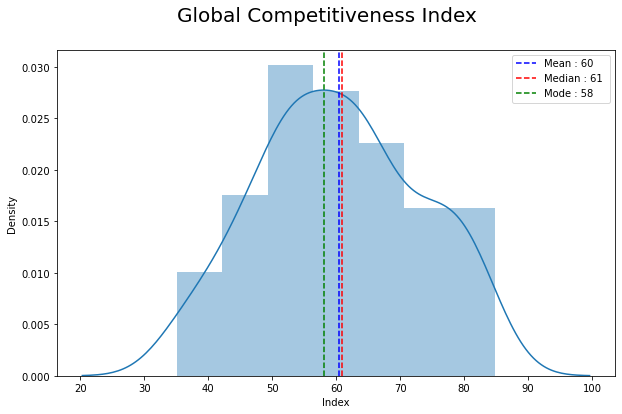

Rata - rata Global Competitiveness Index ialah : 60 


In [355]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Global Competitiveness Index', fontsize=20)
p = sns.distplot(ekonomi_dunia["gci"], axlabel="Index")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["gci"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['gci'].mean():.0f} ")
line2 = plt.axvline(np.median(ekonomi_dunia["gci"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['gci'].median():.0f} ")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.0f} ")
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Global Competitiveness Index ialah : {ekonomi_dunia.gci.mean():.0f} ")

## 5 Teratas dan 5 Terbawah GCI suatu Negara

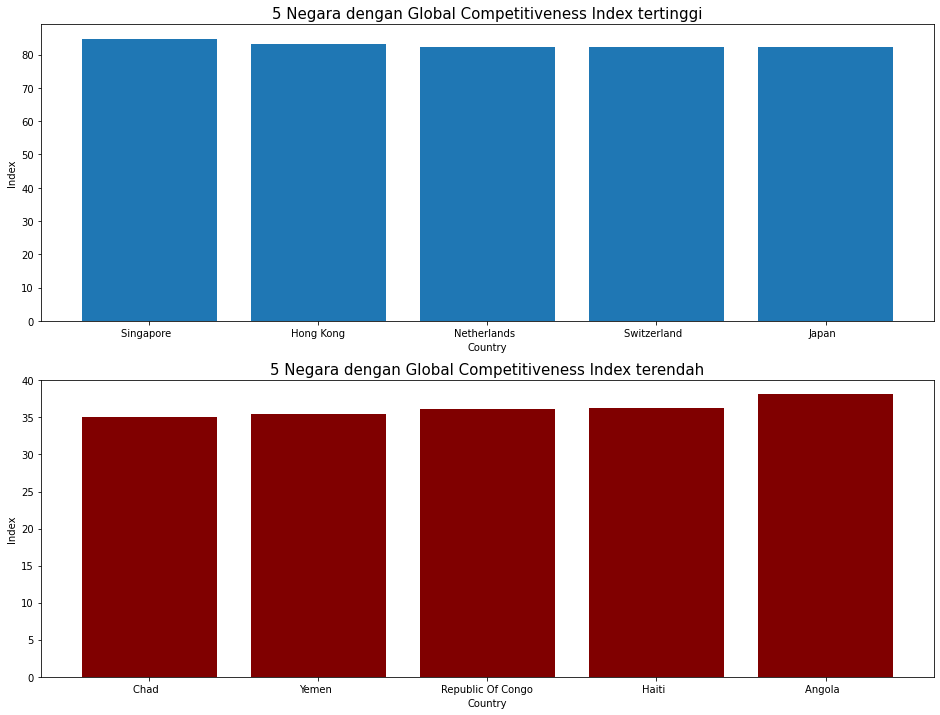

In [356]:
#Filter data pada kolom gci 5 teratas dan 5 terbawah
gci_top_five = ekonomi_dunia[["Country_name","gci"]].sort_values(by=['gci'],ascending=False).head(5)
gci_bottom_five = ekonomi_dunia[["Country_name","gci"]].sort_values(by=['gci'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
plt.bar(gci_top_five['Country_name'], gci_top_five['gci'])
plt.title("5 Negara dengan Global Competitiveness Index tertinggi",fontsize=15)
plt.ylabel('Index')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(gci_bottom_five['Country_name'],gci_bottom_five['gci'],color ='maroon')
plt.title("5 Negara dengan Global Competitiveness Index terendah",fontsize=15)
plt.ylabel('Index')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom GCI menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


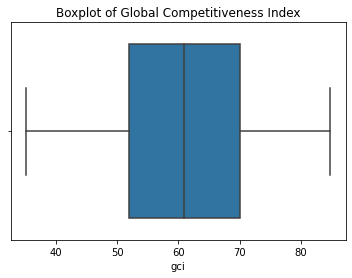

In [357]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["gci"])
plt.title("Boxplot of Global Competitiveness Index")
plt.show()

## Distribusi Data Ekonomi Kolom GDPP

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


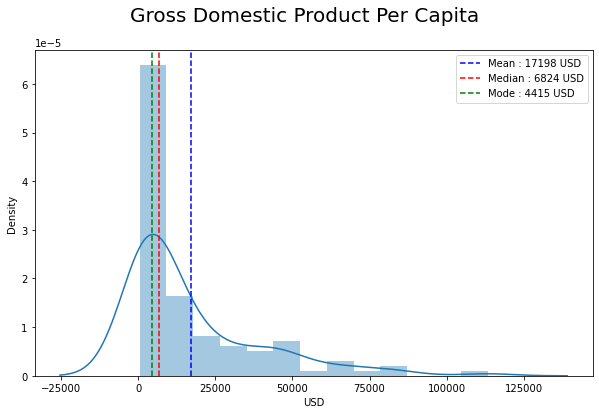

Rata - rata Gross Domestic Product Per Capita ialah : 17198 USD


In [358]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Gross Domestic Product Per Capita', fontsize=20)
p = sns.distplot(ekonomi_dunia["gdpp"], axlabel="USD")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["gdpp"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['gdpp'].mean():.0f} USD")
line2 = plt.axvline(np.median(ekonomi_dunia["gdpp"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['gdpp'].median():.0f} USD")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.0f} USD")
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Gross Domestic Product Per Capita ialah : {ekonomi_dunia.gdpp.mean():.0f} USD")

## 5 Teratas dan 5 Terbawah GDPP suatu Negara

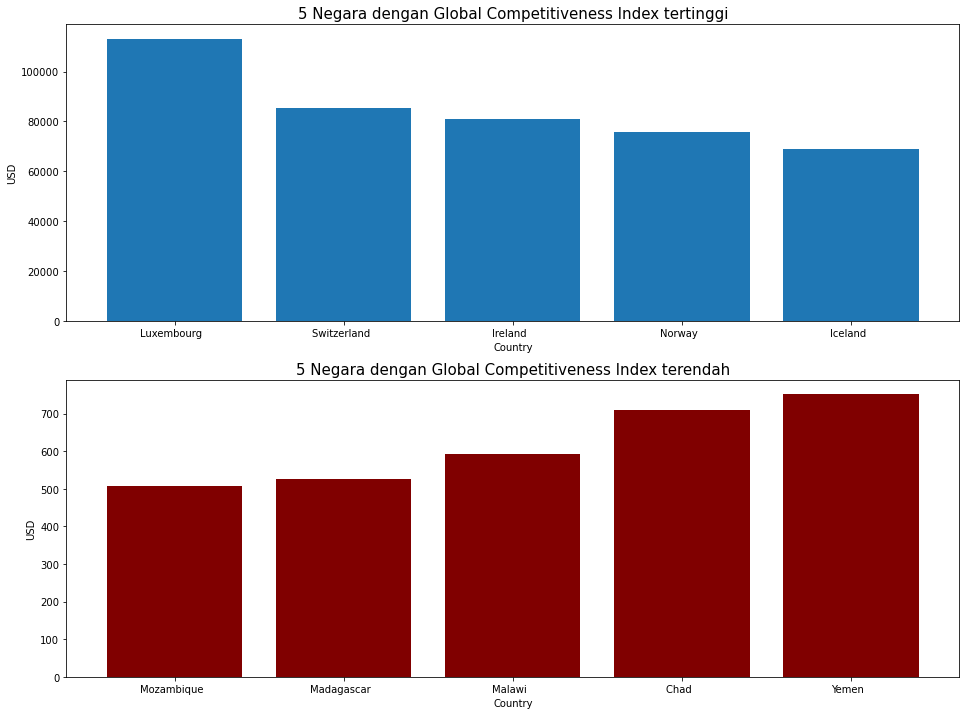

In [359]:
#Filter data pada kolom gdpp 5 teratas dan 5 terbawah
gdpp_top_five = ekonomi_dunia[["Country_name","gdpp"]].sort_values(by=['gdpp'],ascending=False).head(5)
gdpp_bottom_five = ekonomi_dunia[["Country_name","gdpp"]].sort_values(by=['gdpp'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
plt.bar(gdpp_top_five['Country_name'], gdpp_top_five['gdpp'])
plt.title("5 Negara dengan Global Competitiveness Index tertinggi",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(gdpp_bottom_five['Country_name'],gdpp_bottom_five['gdpp'],color ='maroon')
plt.title("5 Negara dengan Global Competitiveness Index terendah",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom GDPP menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


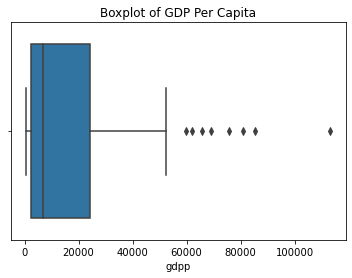

In [360]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["gdpp"])
plt.title("Boxplot of GDP Per Capita")
plt.show()

## Distribusi Data Ekonomi Kolom FDI

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


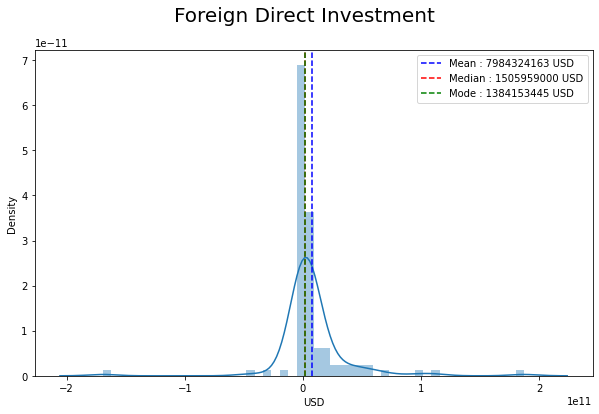

Rata - rata Foreign Direct Investment ialah : 7984324163 USD


In [361]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Foreign Direct Investment', fontsize=20)
p = sns.distplot(ekonomi_dunia["fdi"], axlabel="USD")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["fdi"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['fdi'].mean():.0f} USD")
line2 = plt.axvline(np.median(ekonomi_dunia["fdi"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['fdi'].median():.0f} USD")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.0f} USD")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Foreign Direct Investment ialah : {ekonomi_dunia.fdi.mean():.0f} USD")

## 5 Teratas dan 5 Terbawah FDI suatu Negara

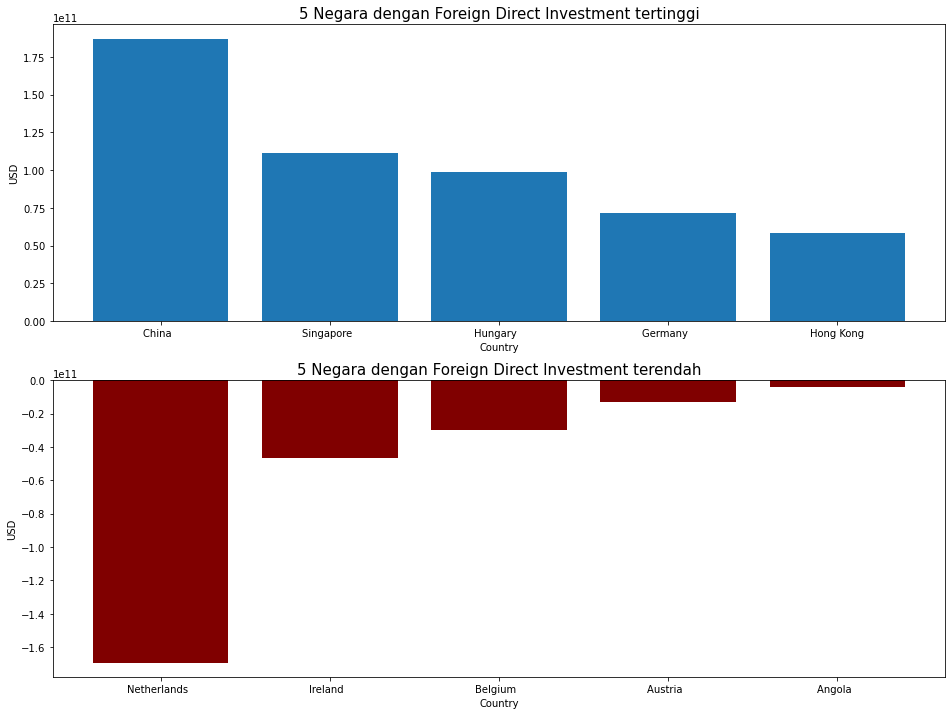

In [362]:
#Filter data pada kolom fdi 5 teratas dan 5 terbawah
fdi_top_five = ekonomi_dunia[["Country_name","fdi"]].sort_values(by=['fdi'],ascending=False).head(5)
fdi_bottom_five = ekonomi_dunia[["Country_name","fdi"]].sort_values(by=['fdi'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(fdi_top_five['Country_name'], fdi_top_five['fdi'])
plt.title("5 Negara dengan Foreign Direct Investment tertinggi",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(fdi_bottom_five['Country_name'],fdi_bottom_five['fdi'],color ='maroon')
plt.title("5 Negara dengan Foreign Direct Investment terendah",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom FDI menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


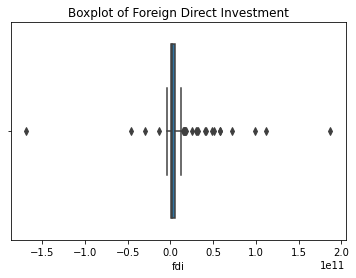

In [363]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["fdi"])
plt.title("Boxplot of Foreign Direct Investment")
plt.show()

## Distribusi Data Ekonomi Kolom Inflation

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


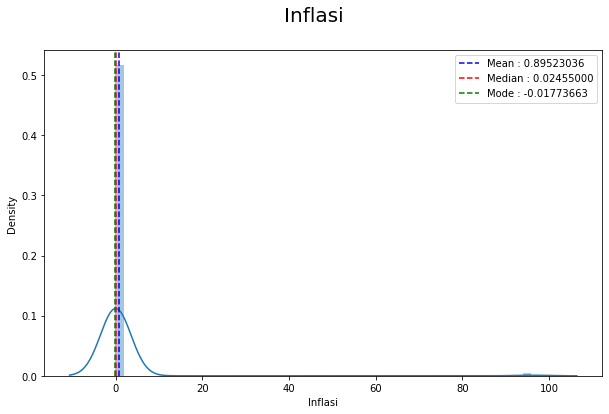

Rata - rata Inflasi ialah : 0.89523036


In [364]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Inflasi', fontsize=20)
p = sns.distplot(ekonomi_dunia["inflation"], axlabel="Inflasi")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["inflation"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['inflation'].mean():.8f}")
line2 = plt.axvline(np.median(ekonomi_dunia["inflation"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['inflation'].median():.8f}")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.8f}")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Inflasi ialah : {ekonomi_dunia.inflation.mean():.8f}")

## 5 Teratas dan 5 Terbawah Inflation suatu Negara

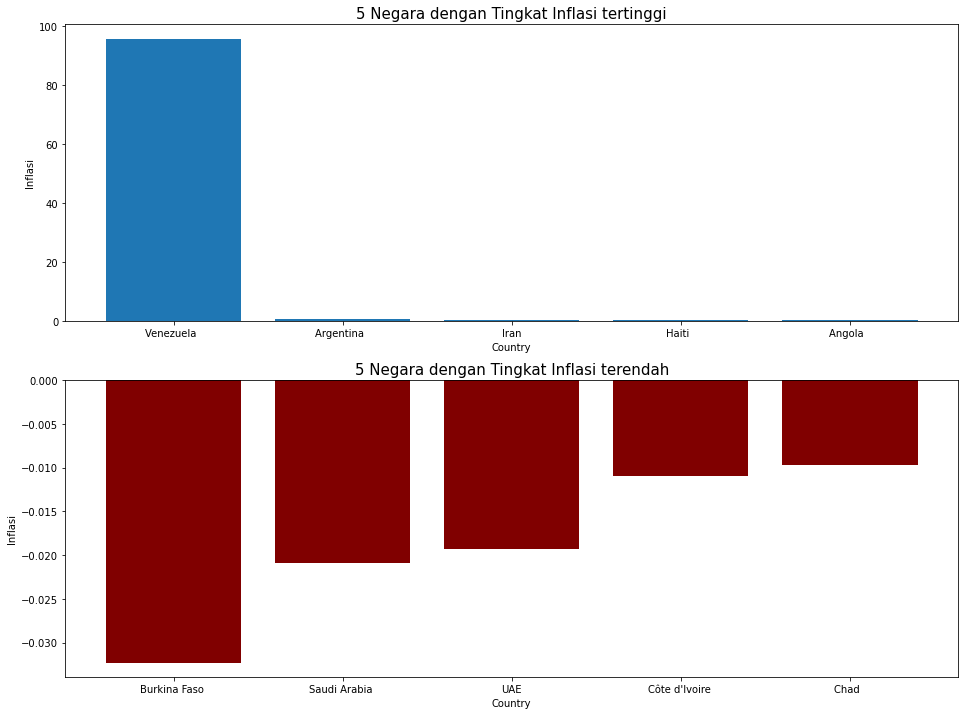

In [365]:
#Filter data pada kolom inflation 5 teratas dan 5 terbawah
inflation_top_five = ekonomi_dunia[["Country_name","inflation"]].sort_values(by=['inflation'],ascending=False).head(5)
inflation_bottom_five = ekonomi_dunia[["Country_name","inflation"]].sort_values(by=['inflation'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(inflation_top_five['Country_name'], inflation_top_five['inflation'])
plt.title("5 Negara dengan Tingkat Inflasi tertinggi",fontsize=15)
plt.ylabel('Inflasi')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(inflation_bottom_five['Country_name'],inflation_bottom_five['inflation'],color ='maroon')
plt.title("5 Negara dengan Tingkat Inflasi terendah",fontsize=15)
plt.ylabel('Inflasi')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Inflation menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


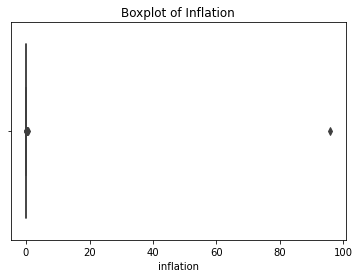

In [366]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["inflation"])
plt.title("Boxplot of Inflation")
plt.show()

## Distribusi Data Ekonomi Kolom healthcare spend

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


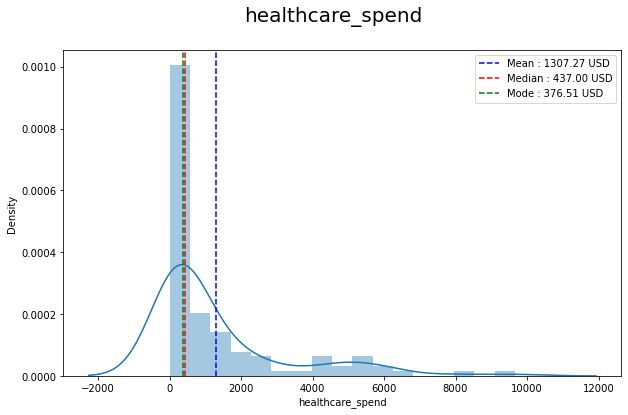

Rata - rata Health Spend ialah : 1307.27 USD


In [367]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('healthcare_spend', fontsize=20)
p = sns.distplot(ekonomi_dunia["healthcare_spend"], axlabel="healthcare_spend")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["healthcare_spend"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['healthcare_spend'].mean():.2f} USD")
line2 = plt.axvline(np.median(ekonomi_dunia["healthcare_spend"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['healthcare_spend'].median():.2f} USD")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} USD")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Health Spend ialah : {ekonomi_dunia.healthcare_spend.mean():.2f} USD")

## 5 Teratas dan 5 Terbawah Healthcare Spend suatu Negara

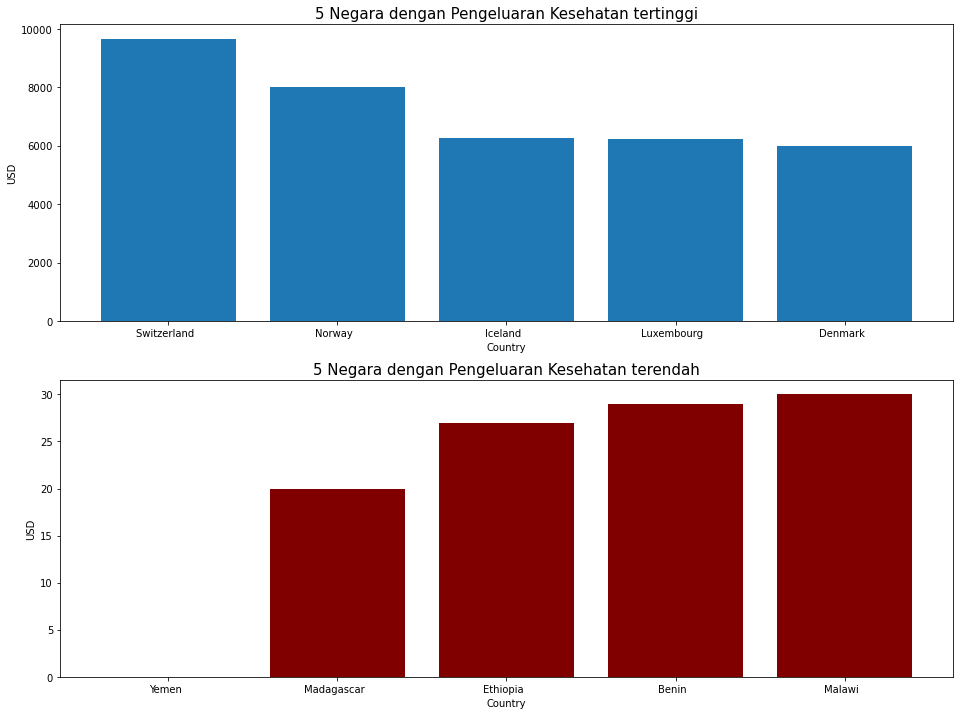

In [368]:
#Filter data pada kolom health_spend 5 teratas dan 5 terbawah
health_top_five = ekonomi_dunia[["Country_name","healthcare_spend"]].sort_values(by=['healthcare_spend'],ascending=False).head(5)
health_bottom_five = ekonomi_dunia[["Country_name","healthcare_spend"]].sort_values(by=['healthcare_spend'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(health_top_five['Country_name'], health_top_five['healthcare_spend'])
plt.title("5 Negara dengan Pengeluaran Kesehatan tertinggi",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(health_bottom_five['Country_name'],health_bottom_five['healthcare_spend'],color ='maroon')
plt.title("5 Negara dengan Pengeluaran Kesehatan terendah",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Inflation menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


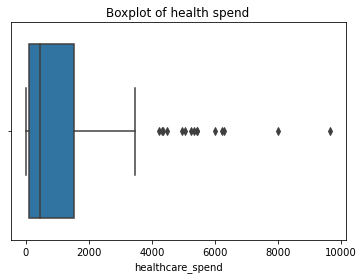

In [369]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["healthcare_spend"])
plt.title("Boxplot of health spend")
plt.show()

## Distribusi Data Ekonomi Kolom Unemployment rate

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


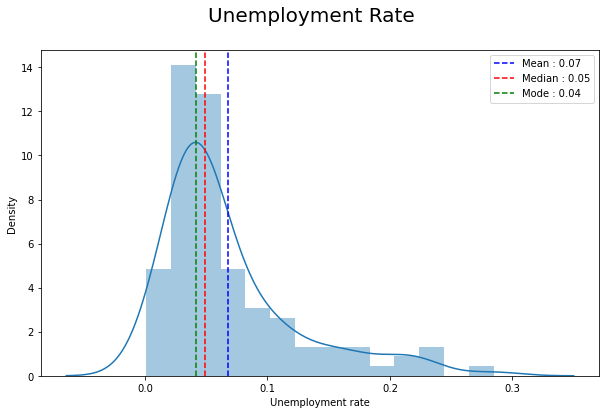

Rata - rata Unemployment Rate ialah : 0.07


In [370]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Unemployment Rate', fontsize=20)
p = sns.distplot(ekonomi_dunia["Unemployment_rate"], axlabel="Unemployment rate")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["Unemployment_rate"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['Unemployment_rate'].mean():.2f}")
line2 = plt.axvline(np.median(ekonomi_dunia["Unemployment_rate"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['Unemployment_rate'].median():.2f}")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} ")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Unemployment Rate ialah : {ekonomi_dunia.Unemployment_rate.mean():.2f}")

## 5 Teratas dan 5 Terbawah Unemployment Rate suatu Negara

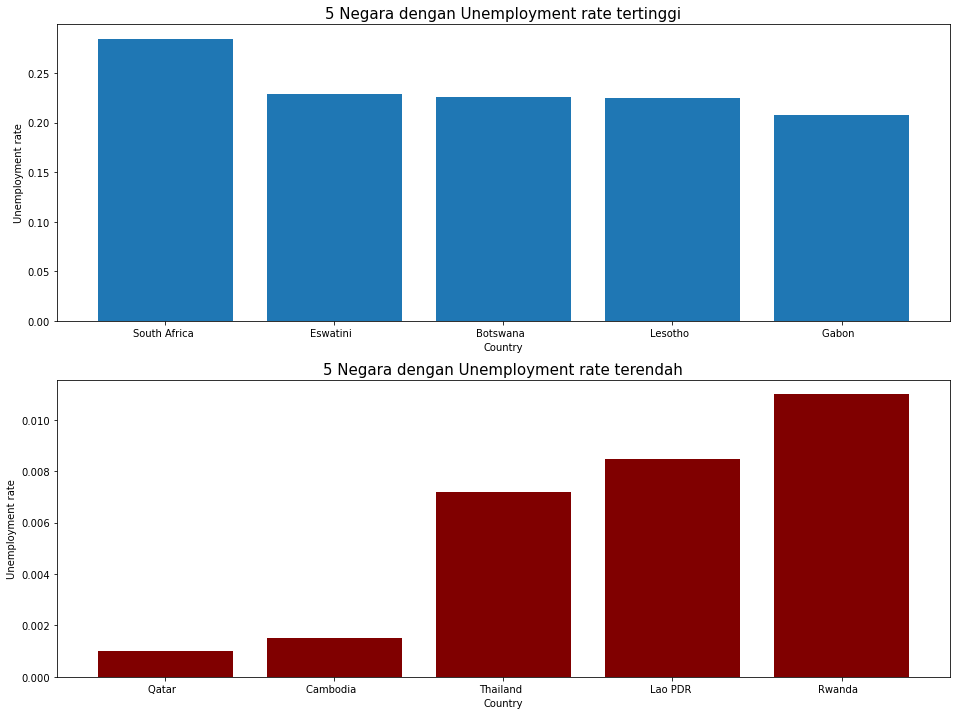

In [371]:
#Filter data pada kolom unemployment_rate 5 teratas dan 5 terbawah
unemployment_top_five = ekonomi_dunia[["Country_name","Unemployment_rate"]].sort_values(by=['Unemployment_rate'],ascending=False).head(5)
unemployment_bottom_five = ekonomi_dunia[["Country_name","Unemployment_rate"]].sort_values(by=['Unemployment_rate'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(unemployment_top_five['Country_name'], unemployment_top_five['Unemployment_rate'])
plt.title("5 Negara dengan Unemployment rate tertinggi",fontsize=15)
plt.ylabel('Unemployment rate')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(unemployment_bottom_five['Country_name'],unemployment_bottom_five['Unemployment_rate'],color ='maroon')
plt.title("5 Negara dengan Unemployment rate terendah",fontsize=15)
plt.ylabel('Unemployment rate')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Unemployment Rate menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


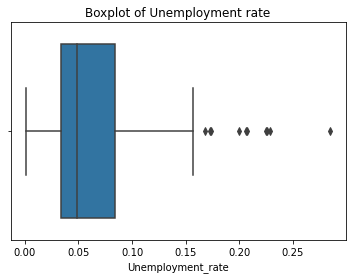

In [372]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["Unemployment_rate"])
plt.title("Boxplot of Unemployment rate")
plt.show()

## Distribusi Data Ekonomi Kolom Carbon Emissions

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


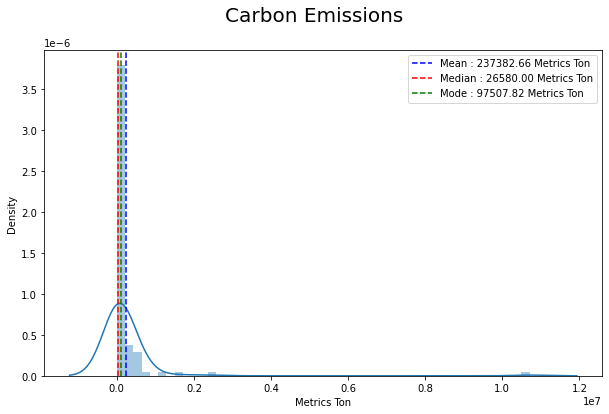

Rata - rata Carbon Emmision ialah : 237382.66 Metrics Ton


In [373]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Carbon Emissions', fontsize=20)
p = sns.distplot(ekonomi_dunia["carbon_emissions"], axlabel="Metrics Ton")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["carbon_emissions"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['carbon_emissions'].mean():.2f} Metrics Ton")
line2 = plt.axvline(np.median(ekonomi_dunia["carbon_emissions"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['carbon_emissions'].median():.2f} Metrics Ton")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} Metrics Ton")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Carbon Emmision ialah : {ekonomi_dunia.carbon_emissions.mean():.2f} Metrics Ton")

## 5 Teratas dan 5 Terbawah Carbon Emissions suatu Negara

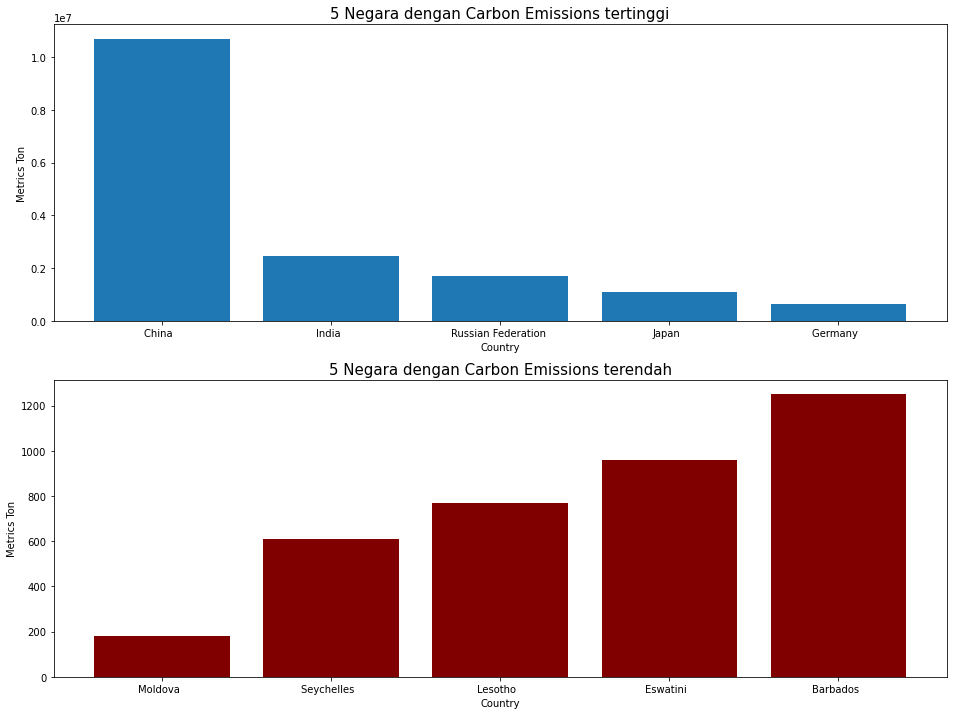

In [374]:
#Filter data pada kolom carbon_emission 5 teratas dan 5 terbawah
carbon_top_five = ekonomi_dunia[["Country_name","carbon_emissions"]].sort_values(by=['carbon_emissions'],ascending=False).head(5)
carbon_bottom_five = ekonomi_dunia[["Country_name","carbon_emissions"]].sort_values(by=['carbon_emissions'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(carbon_top_five['Country_name'], carbon_top_five['carbon_emissions'])
plt.title("5 Negara dengan Carbon Emissions tertinggi",fontsize=15)
plt.ylabel('Metrics Ton')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(carbon_bottom_five['Country_name'],carbon_bottom_five['carbon_emissions'],color ='maroon')
plt.title("5 Negara dengan Carbon Emissions terendah",fontsize=15)
plt.ylabel('Metrics Ton')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Carbon Emissions menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


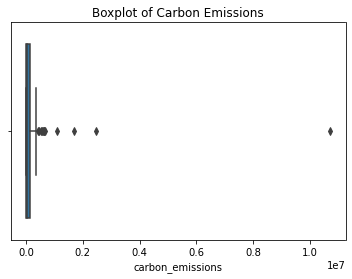

In [375]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["carbon_emissions"])
plt.title("Boxplot of Carbon Emissions")
plt.show()

## Distribusi Data Ekonomi Kolom Export

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


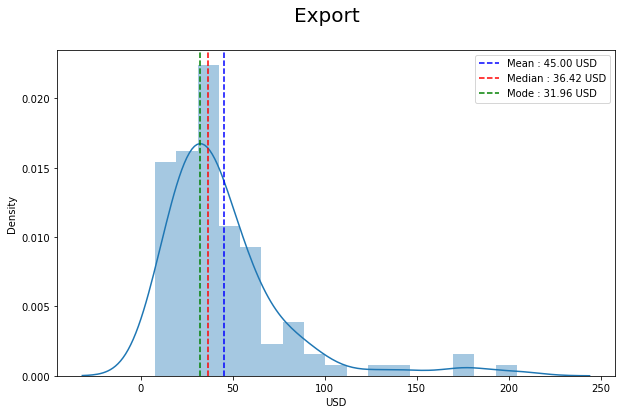

Rata - rata Export ialah : 45.00 USD


In [376]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Export', fontsize=20)
p = sns.distplot(ekonomi_dunia["Export"], axlabel="USD")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["Export"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['Export'].mean():.2f} USD")
line2 = plt.axvline(np.median(ekonomi_dunia["Export"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['Export'].median():.2f} USD")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} USD")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Export ialah : {ekonomi_dunia.Export.mean():.2f} USD")

## 5 Teratas dan 5 Terbawah Export suatu Negara

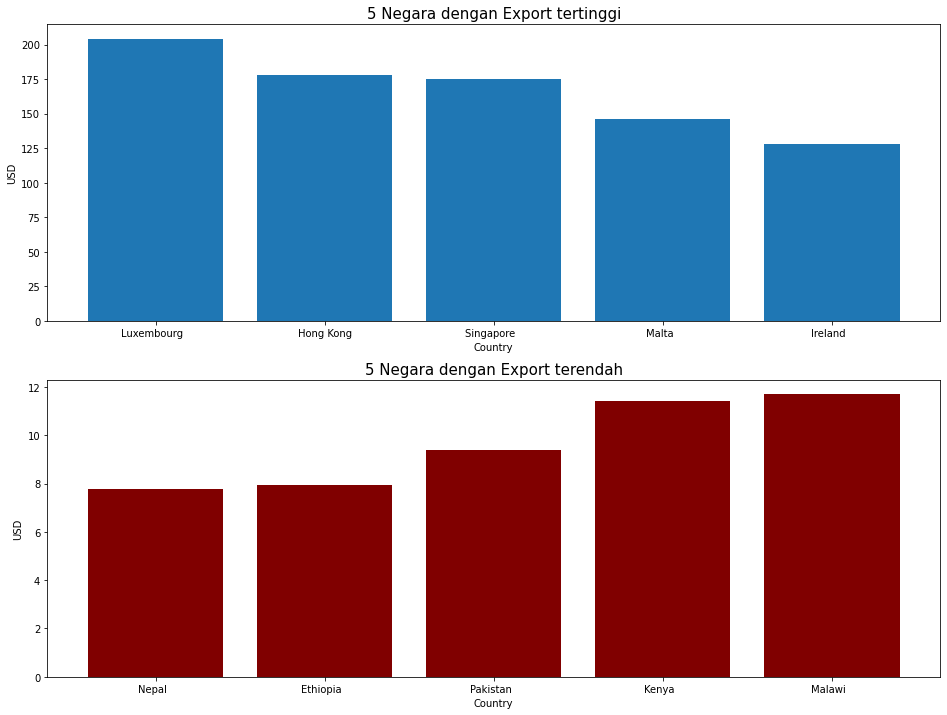

In [377]:
#Filter data pada kolom Export 5 teratas dan 5 terbawah
Export_top_five = ekonomi_dunia[["Country_name","Export"]].sort_values(by=['Export'],ascending=False).head(5)
Export_bottom_five = ekonomi_dunia[["Country_name","Export"]].sort_values(by=['Export'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(Export_top_five['Country_name'], Export_top_five['Export'])
plt.title("5 Negara dengan Export tertinggi",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(Export_bottom_five['Country_name'],Export_bottom_five['Export'],color ='maroon')
plt.title("5 Negara dengan Export terendah",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Export menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


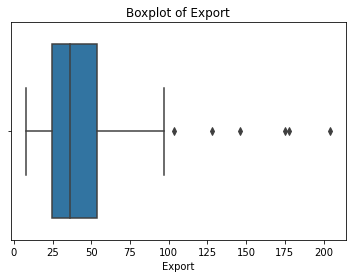

In [378]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["Export"])
plt.title("Boxplot of Export")
plt.show()

## Distribusi Data Ekonomi Kolom Import

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


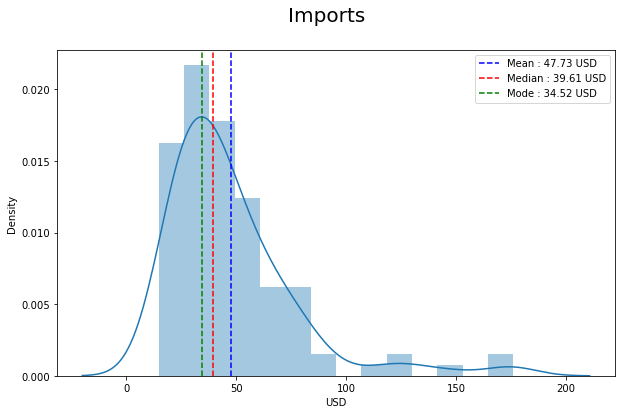

Rata - rata Imports ialah : 47.73 USD


In [379]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Imports', fontsize=20)
p = sns.distplot(ekonomi_dunia["Imports"], axlabel="USD")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["Imports"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['Imports'].mean():.2f} USD")
line2 = plt.axvline(np.median(ekonomi_dunia["Imports"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['Imports'].median():.2f} USD")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} USD")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Imports ialah : {ekonomi_dunia.Imports.mean():.2f} USD")

## 5 Teratas dan 5 Terbawah Imports suatu Negara

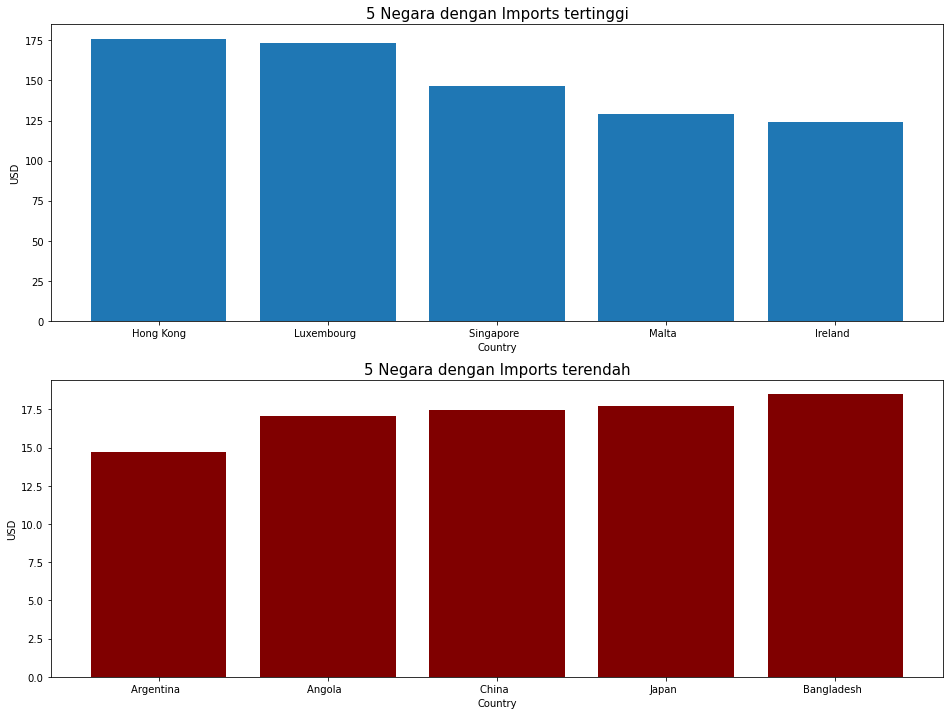

In [380]:
#Filter data pada kolom Imports 5 teratas dan 5 terbawah
Imports_top_five = ekonomi_dunia[["Country_name","Imports"]].sort_values(by=['Imports'],ascending=False).head(5)
Imports_bottom_five = ekonomi_dunia[["Country_name","Imports"]].sort_values(by=['Imports'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(Imports_top_five['Country_name'], Imports_top_five['Imports'])
plt.title("5 Negara dengan Imports tertinggi",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(Imports_bottom_five['Country_name'],Imports_bottom_five['Imports'],color ='maroon')
plt.title("5 Negara dengan Imports terendah",fontsize=15)
plt.ylabel('USD')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Imports menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


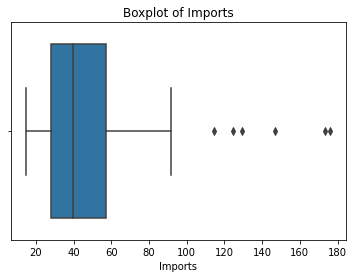

In [381]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["Imports"])
plt.title("Boxplot of Imports")
plt.show()

## Distribusi Data Ekonomi Kolom MYS

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


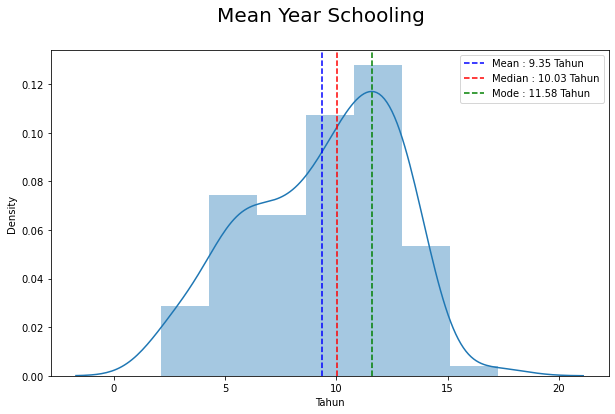

Rata - rata Mean Year Schooling ialah : 9.35 Tahun


In [382]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Mean Year Schooling', fontsize=20)
p = sns.distplot(ekonomi_dunia["mys"], axlabel="Tahun")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["mys"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['mys'].mean():.2f} Tahun")
line2 = plt.axvline(np.median(ekonomi_dunia["mys"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['mys'].median():.2f} Tahun")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f} Tahun")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Mean Year Schooling ialah : {ekonomi_dunia.mys.mean():.2f} Tahun")

## 5 Teratas dan 5 Terbawah MYS suatu Negara

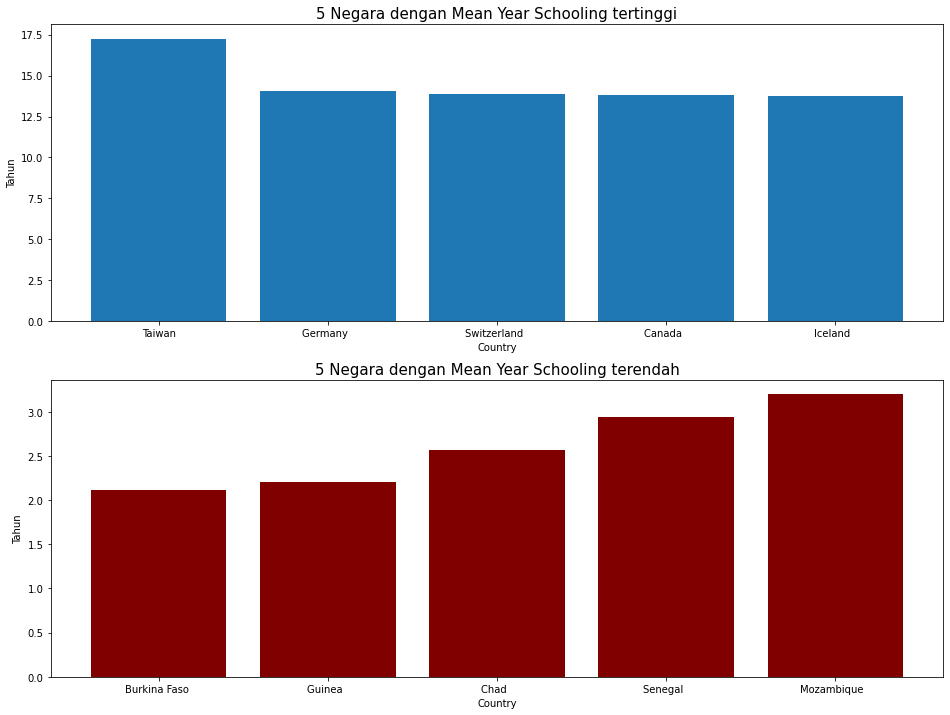

In [383]:
#Filter data pada kolom mys 5 teratas dan 5 terbawah
mys_top_five = ekonomi_dunia[["Country_name","mys"]].sort_values(by=['mys'],ascending=False).head(5)
mys_bottom_five = ekonomi_dunia[["Country_name","mys"]].sort_values(by=['mys'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(mys_top_five['Country_name'], mys_top_five['mys'])
plt.title("5 Negara dengan Mean Year Schooling tertinggi",fontsize=15)
plt.ylabel('Tahun')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(mys_bottom_five['Country_name'],mys_bottom_five['mys'],color ='maroon')
plt.title("5 Negara dengan Mean Year Schooling terendah",fontsize=15)
plt.ylabel('Tahun')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom MYS menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


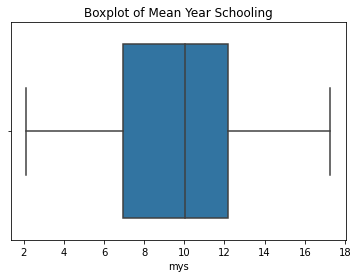

In [384]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["mys"])
plt.title("Boxplot of Mean Year Schooling")
plt.show()

## Distribusi Data Ekonomi Kolom Gender Inequality

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


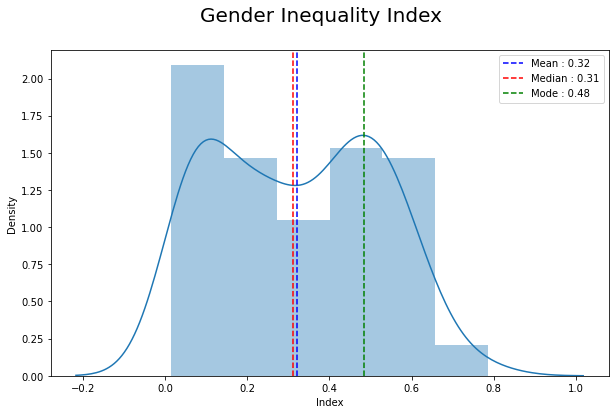

Rata - rata Gender Inequality ialah : 0.32


In [385]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Gender Inequality Index', fontsize=20)
p = sns.distplot(ekonomi_dunia["gender_inequality"], axlabel="Index")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(ekonomi_dunia["gender_inequality"]), color="b", linestyle="--", label=f"Mean : {ekonomi_dunia['gender_inequality'].mean():.2f}")
line2 = plt.axvline(np.median(ekonomi_dunia["gender_inequality"]), color="r", linestyle="--", label=f"Median : {ekonomi_dunia['gender_inequality'].median():.2f}")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f}")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
 
#Show visualisasi
plt.show()

print(f"Rata - rata Gender Inequality ialah : {ekonomi_dunia.gender_inequality.mean():.2f}")

## 5 Teratas dan 5 Terbawah Gender Inequality suatu Negara

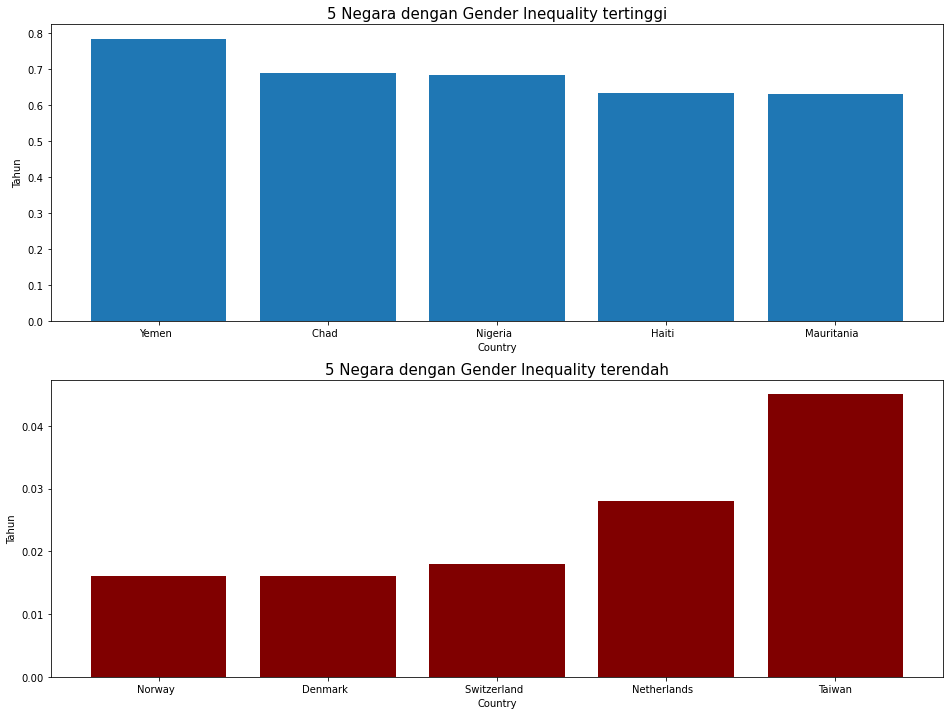

In [386]:
#Filter data pada kolom gender_inequality 5 teratas dan 5 terbawah
gender_inequality_top_five = ekonomi_dunia[["Country_name","gender_inequality"]].sort_values(by=['gender_inequality'],ascending=False).head(5)
gender_inequality_bottom_five = ekonomi_dunia[["Country_name","gender_inequality"]].sort_values(by=['gender_inequality'],ascending=True).head(5)

# Draw first subplot using plt.subplot
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.bar(gender_inequality_top_five['Country_name'], gender_inequality_top_five['gender_inequality'])
plt.title("5 Negara dengan Gender Inequality tertinggi",fontsize=15)
plt.ylabel('Tahun')
plt.xlabel('Country')

# Draw second subplot using plt.subplot
plt.subplot(2, 1, 2)
plt.bar(gender_inequality_bottom_five['Country_name'],gender_inequality_bottom_five['gender_inequality'],color ='maroon')
plt.title("5 Negara dengan Gender Inequality terendah",fontsize=15)
plt.ylabel('Tahun')
plt.xlabel('Country')

#Menampilkan Plot
plt.show()

## Melihat Outlier Data Ekonomi Kolom Gender Inequality menggunakan Boxplot

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


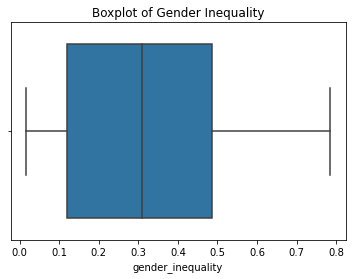

In [387]:
#Melakukan visualisasi data dengan boxplot
sns.boxplot(ekonomi_dunia["gender_inequality"])
plt.title("Boxplot of Gender Inequality")
plt.show()

# Pair Plot 

<Figure size 432x288 with 0 Axes>

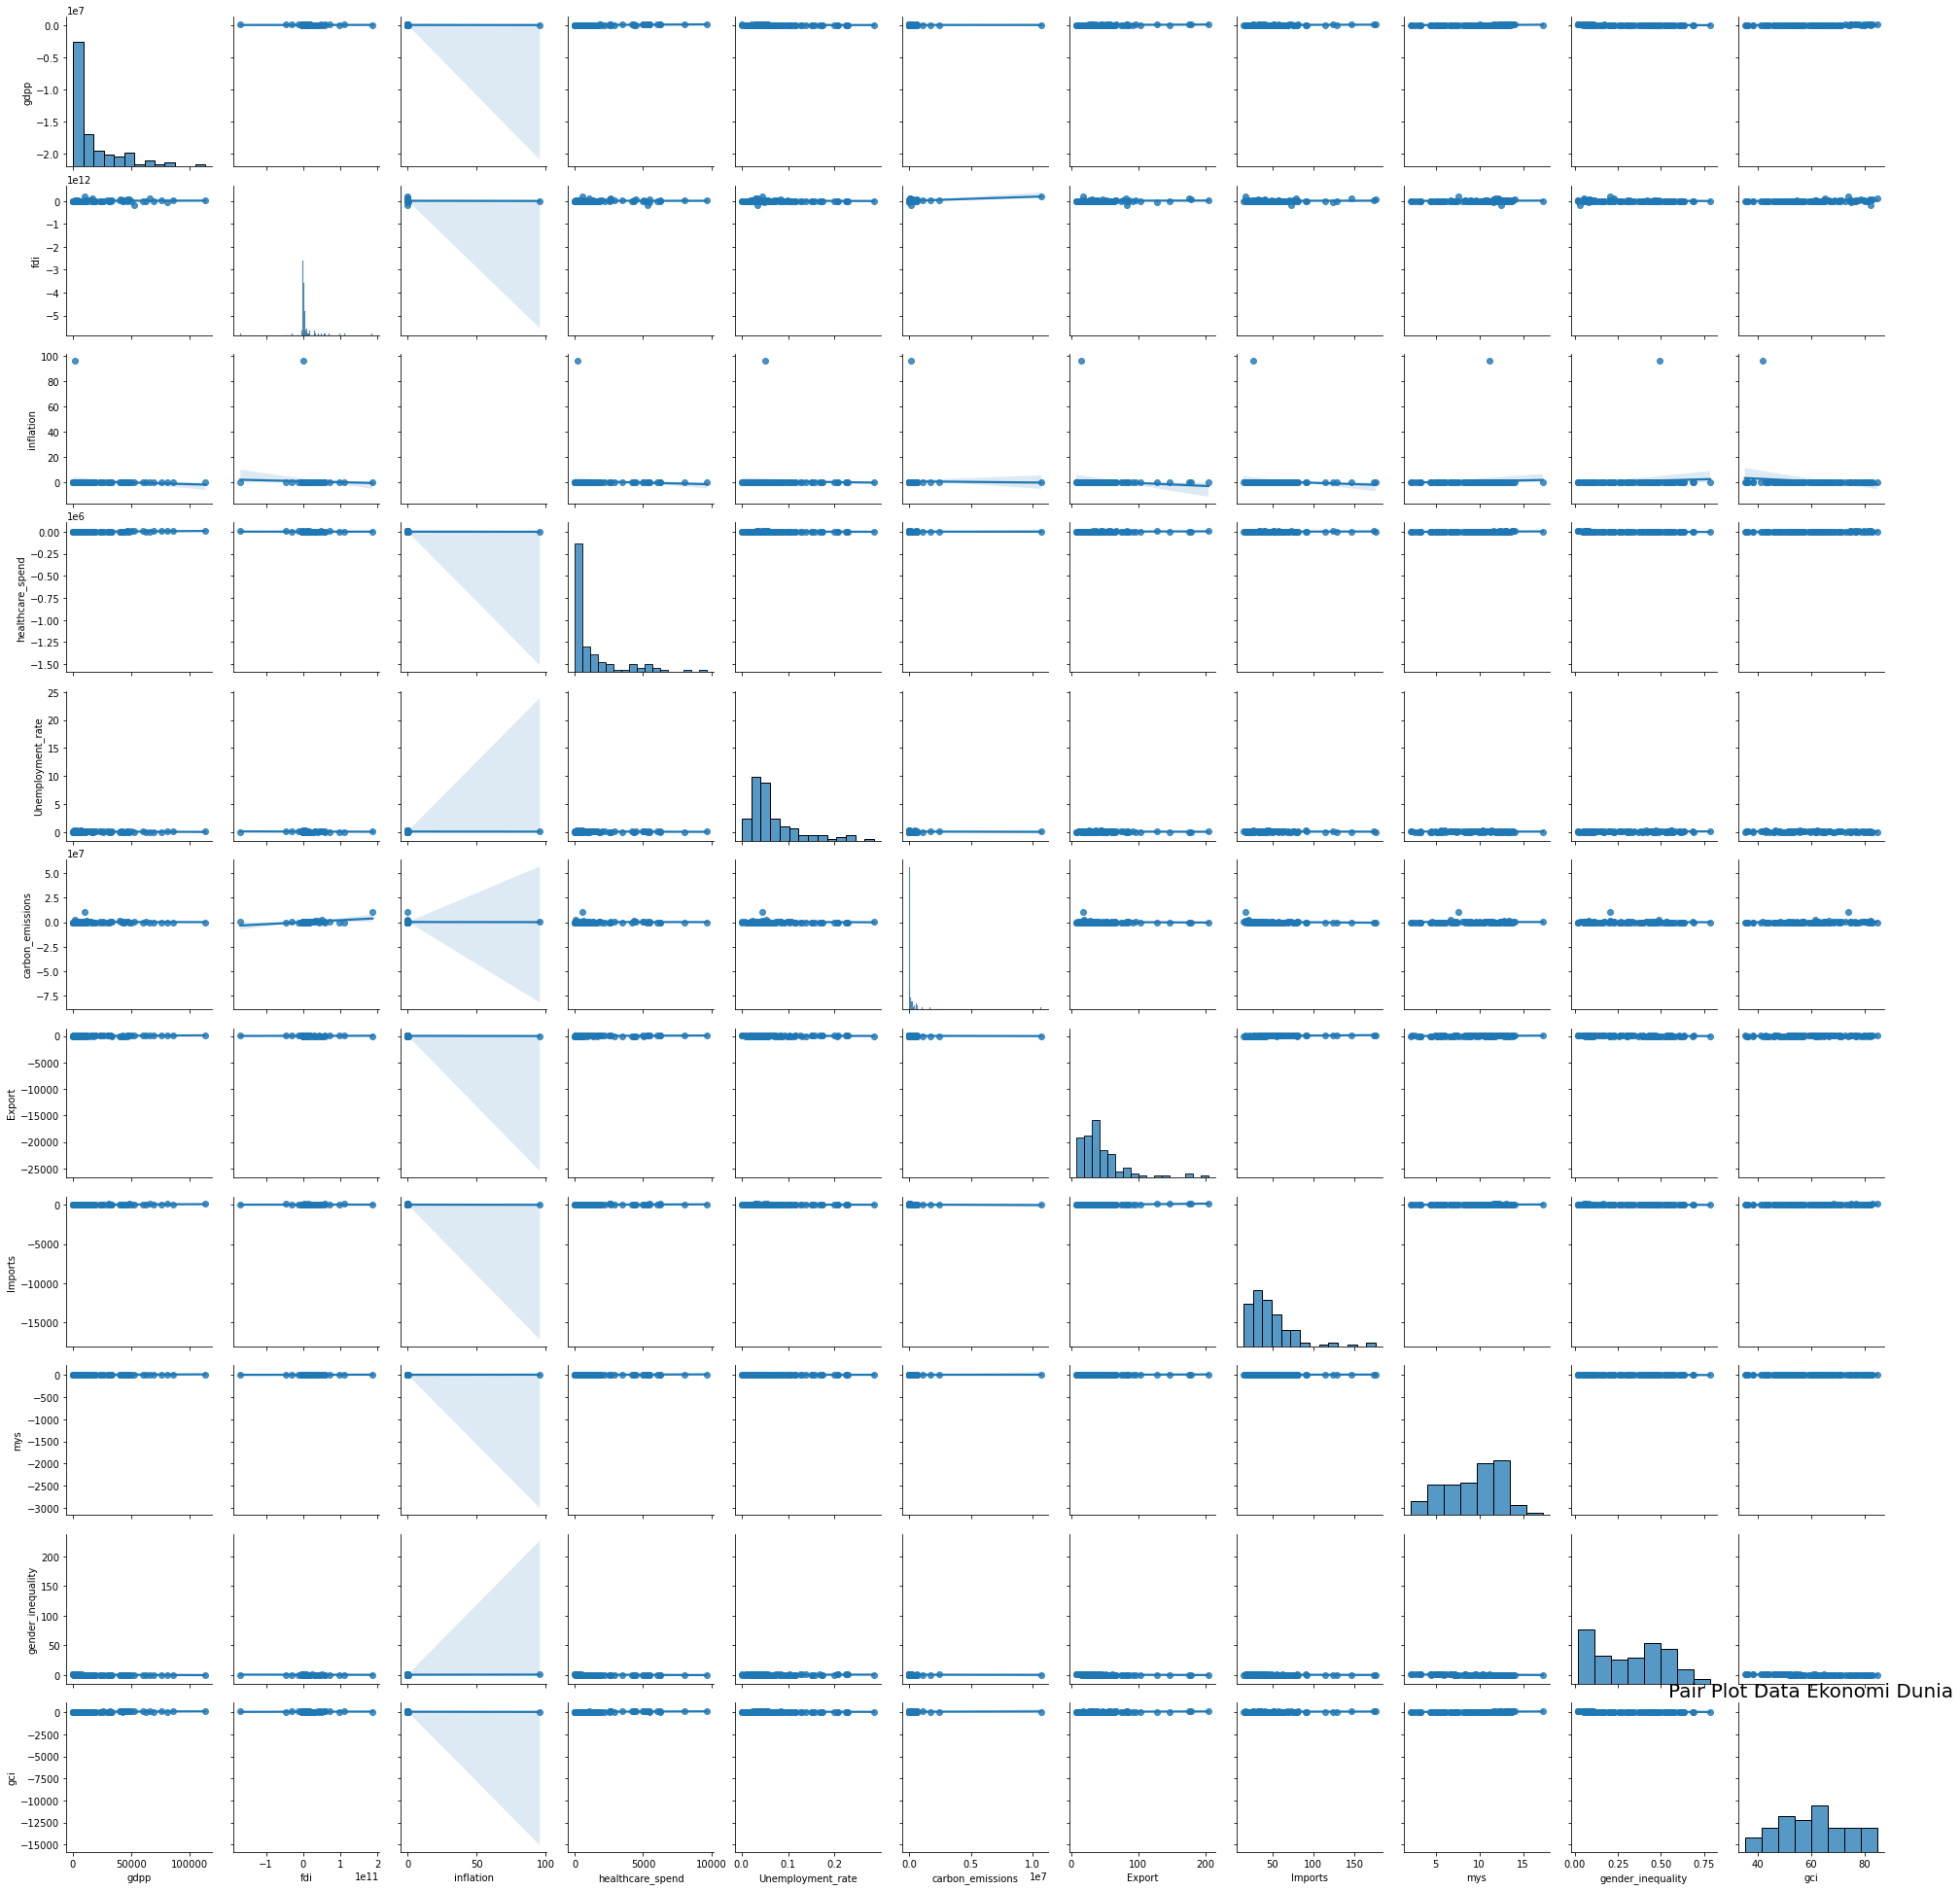

In [388]:
#Membentuk visualisasi dengan pair plot
plt.figure()
sns.pairplot(ekonomi_dunia, kind='reg')
plt.title('Pair Plot Data Ekonomi Dunia', fontsize=20)
plt.show()

# Correlation

### Correlation Pearson

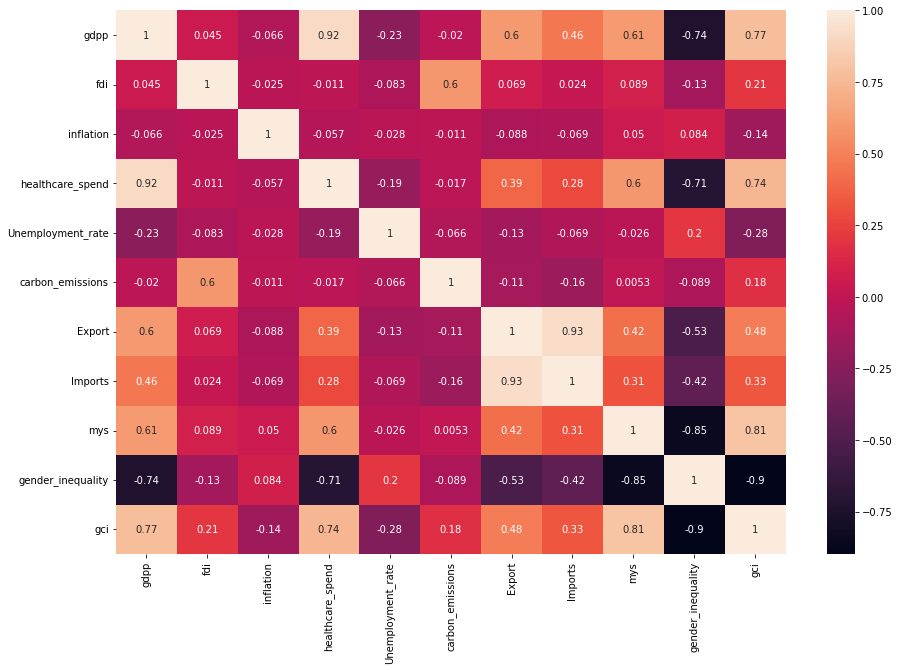

In [389]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(ekonomi_dunia.corr(method='pearson', min_periods=1),annot=True)
plt.show()

### Kesimpulan Hasil Hitung Korelasi Pearson

Setelah dilakukan eksplorasi data menghasilkan beberapa insight yang didapat 

* gdpp memilik korelasi kuat sebesar 0.92 dengan healtspend
* mys memilik korelasi kuat sebesar 0.81 dengan gci
* Imports memilik korelasi kuat sebesar 0.93 dengan Export

* gender_inequality memiliki korelasi lemah sebesar -0.9 dengan gci
* gender_inequality memiliki korelasi lemah sebesar -0.85 dengan mys
* gender_inequality memiliki korelasi lemah sebesar -0.74 dengan gdpp

### Keputusan Hasil Eksplorasi Data

* Data yang memiliki outlier akan tetap dilanjutkan ke tahap pemodelan, penulis menginginkan pemodelan dengan menggunakan data asli

# Data Pre-Processing

## Menghapus Fitur Country_name yang tidak digunakan dalam pemodelan

In [390]:
#Menghapus fitur country name
X_train = X_train.drop(["Country_name"], axis=1)
X_test = X_test.drop(["Country_name"], axis=1)

In [391]:
#Sanity check pada data x train sehabis drop Country_name
X_train

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
87,3235,1720825003,0.0030,174,0.0928,71480,34.093057,41.905058,5.916000,0.432
37,3019,9010100000,0.0915,150,0.0784,249370,17.500611,25.739840,9.573026,0.468
29,12762,2719031329,0.0210,922,0.1149,8240,34.325322,31.435208,8.763615,0.269
62,33673,31185214397,0.0061,2906,0.0995,317240,31.602420,28.276560,10.653280,0.054
102,3485,8671365874,0.0239,142,0.0224,145420,28.382920,40.458922,8.969100,0.421
...,...,...,...,...,...,...,...,...,...,...
17,31086,373256767,-0.0039,672,0.0692,6990,57.946041,50.563618,9.180000,0.258
98,1482,2234000000,0.1058,39,0.0354,190570,9.390863,19.514712,4.536330,0.534
66,9813,3730856271,0.0525,273,0.0480,212110,36.438987,28.419629,12.347562,0.168
126,7814,4790362175,0.0071,296,0.0072,267090,59.507485,50.161010,8.697120,0.335


In [392]:
#Sanity check pada data x test sehabis drop Country_name
X_test

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
104,23331,10320042522,0.0034,2221,0.0646,44640,43.508422,43.056296,9.327420,0.071
129,9122,9573000000,0.1518,396,0.1367,396840,32.527202,30.161527,8.633140,0.277
112,7417,4268709250,0.0185,641,0.1039,45950,51.010923,60.943674,11.369870,0.128
45,773,71083306,0.0712,30,0.0950,580,18.841398,34.428255,4.485152,0.605
31,15312,3904101553,0.0077,1040,0.0662,16520,50.594538,51.005970,12.191084,0.119
79,879,859091549,-0.0166,34,0.0744,5830,25.705291,37.953412,2.310000,0.667
74,19576,3434299310,0.0233,1370,0.0626,11730,77.324562,72.007011,13.394863,0.122
35,8282,2829200000,0.0181,491,0.0636,27230,23.069282,27.941863,9.306864,0.443
4,4605,100946084,0.0144,524,0.1830,6170,41.350801,54.763353,11.282730,0.239
127,17123,183972765,0.0100,1168,0.0342,17190,12.856575,34.681816,11.610624,0.344


## Handling Missing Values

In [393]:
def numericalImputation(data, numerical_column):
    """
    Fungsi untuk melakukan imputasi data numerik
    :param data: <pandas dataframe> sample data input
    :param numerical_column: <list> list kolom numerik data
    :return X_train_numerical: <pandas dataframe> data numerik
    :return imputer_numerical: numerical imputer method
    """
    # Filter data numerik
    numerical_data = data[numerical_column]

    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "median")
    imputer_numerical.fit(numerical_data)

    # Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index

    return numerical_data_imputed, imputer_numerical

In [394]:
# Input
numerical_column = ["gdpp","fdi","inflation","healthcare_spend",
                    "Unemployment_rate","carbon_emissions", "Export",
                    "Imports","mys","gender_inequality"]

# Imputation Numeric
X_train, imputer_numerical = numericalImputation(data = X_train,
                                                 numerical_column = numerical_column)

In [395]:
#Sanity Check pada data X train
X_train

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
87,3235.0,1.720825e+09,0.0030,174.0,0.0928,71480.0,34.093057,41.905058,5.916000,0.432
37,3019.0,9.010100e+09,0.0915,150.0,0.0784,249370.0,17.500611,25.739840,9.573026,0.468
29,12762.0,2.719031e+09,0.0210,922.0,0.1149,8240.0,34.325322,31.435208,8.763615,0.269
62,33673.0,3.118521e+10,0.0061,2906.0,0.0995,317240.0,31.602420,28.276560,10.653280,0.054
102,3485.0,8.671366e+09,0.0239,142.0,0.0224,145420.0,28.382920,40.458922,8.969100,0.421
...,...,...,...,...,...,...,...,...,...,...
17,31086.0,3.732568e+08,-0.0039,672.0,0.0692,6990.0,57.946041,50.563618,9.180000,0.258
98,1482.0,2.234000e+09,0.1058,39.0,0.0354,190570.0,9.390863,19.514712,4.536330,0.534
66,9813.0,3.730856e+09,0.0525,273.0,0.0480,212110.0,36.438987,28.419629,12.347562,0.168
126,7814.0,4.790362e+09,0.0071,296.0,0.0072,267090.0,59.507485,50.161010,8.697120,0.335


### Scalling Data

In [396]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [397]:
# Transform data Train
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)

#Sanity check pada data X_train_clean
X_train_clean

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
87,-0.634053,-0.201490,-0.098984,-0.587649,0.445456,-0.158836,-0.323492,-0.196975,-1.050602,0.561223
37,-0.643862,0.032998,-0.089165,-0.600094,0.186646,0.011477,-0.815836,-0.743488,0.069593,0.742949
29,-0.201432,-0.169379,-0.096987,-0.199778,0.842658,-0.219382,-0.316601,-0.550939,-0.178341,-0.261592
62,0.748135,0.746348,-0.098640,0.829013,0.565875,0.076456,-0.397396,-0.657727,0.400489,-1.346899
102,-0.622701,0.022101,-0.096665,-0.604242,-0.819839,-0.088045,-0.492928,-0.245865,-0.115398,0.505696
...,...,...,...,...,...,...,...,...,...,...
17,0.630660,-0.244840,-0.099749,-0.329414,0.021295,-0.220578,0.384291,0.095754,-0.050796,-0.317119
98,-0.713657,-0.184982,-0.087579,-0.657652,-0.586191,-0.044819,-1.056474,-0.953947,-1.473213,1.076113
66,-0.335346,-0.136830,-0.093492,-0.536313,-0.359732,-0.024196,-0.253882,-0.652890,0.919469,-0.771434
126,-0.426121,-0.102746,-0.098529,-0.524387,-1.093028,0.028442,0.430623,0.082143,-0.198709,0.071573


In [398]:
# Transform data Test
X_test_clean = scaler.transform(X_test)
X_test_clean = pd.DataFrame(X_test_clean,
                             columns = X_test.columns,
                             index = X_test.index)

#Sanity check pada data X_train_clean setelah ditransform
X_test_clean.head()

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
104,0.278505,0.075138,-0.098939,0.473810,-0.061381,-0.184532,-0.044113,-0.158053,-0.005640,-1.261084
129,-0.366725,0.051106,-0.082476,-0.472532,1.234468,0.152665,-0.369956,-0.594000,-0.218307,-0.221208
112,-0.444149,-0.119527,-0.097264,-0.345489,0.644956,-0.183278,0.178507,0.446683,0.619990,-0.973352
45,-0.745852,-0.254561,-0.091418,-0.662319,0.484997,-0.226715,-0.776051,-0.449750,-1.488890,1.434517
31,-0.085637,-0.131256,-0.098462,-0.138590,-0.032624,-0.211454,0.166152,0.110709,0.871538,-1.018783


## Prediksi dengan Baseline Model

In [399]:
#Prediksi dengan Baseline Model berbasiskan rata-rata
y_baseline_predict = y_train.mean()
y_baseline_predict

60.48303571428572

### Evaluasi Model Baseline

In [400]:
#Melihat Mean Absolute Error pada baseline Model
mae_train_baseline = mean_absolute_error(y_train, y_baseline_predict * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_baseline_predict * np.ones(len(y_test)))

#Melihat mae train baseline dan mae tes baseline
mae_train_baseline, mae_test_baseline

(10.433641581632653, 8.963823891625617)

## Prediksi Menggunakan Linear Regression

In [401]:
#Build LinearRegression
lin_reg = LinearRegression()

In [402]:
#Fitting Model LinearRegression
lin_reg.fit(X_train, y_train)

LinearRegression()

In [403]:
# Predict
y_pred_train = lin_reg.predict(X_train_clean)
y_pred_test = lin_reg.predict(X_test_clean)

# MSE
mae_train_lg = mean_absolute_error(y_train, y_pred_train)
mae_test_lg = mean_absolute_error(y_test, y_pred_test)

#Melihat hasil mae train lg dan mae test lg
mae_train_lg, mae_test_lg

(24.471752416944177, 20.37838590130506)

## Prediksi dengan DecisionTree

In [404]:
#Parameter max depth decision tree
params = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

# Buat gridsearch
dec_tree = DecisionTreeRegressor(random_state = 123)

dec_tree_cv = GridSearchCV(estimator = dec_tree,
                           param_grid = params,
                           cv = 7,
                           scoring = "neg_mean_absolute_error")

In [405]:
# Fit grid search cv
dec_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='neg_mean_absolute_error')

In [406]:
# Best params
dec_tree_cv.best_params_

{'max_depth': 3}

In [407]:
# Refit the bagging tree
dec_tree = DecisionTreeRegressor(max_depth = dec_tree_cv.best_params_["max_depth"],
                                 random_state = 123)

dec_tree.fit(X_train_clean, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [408]:
# Predict
y_pred_train = dec_tree.predict(X_train_clean)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_cv_dt = -dec_tree_cv.best_score_

print(f"MAE Train :{mae_train_dt:.4f}")
print(f"MAE CV    :{mae_cv_dt:.4f}")

MAE Train :3.0249
MAE CV    :4.5742


## Prediksi dengan ExtraTreesRegressor

In [409]:
#Build Extratrees
Extra_trees = ExtraTreesRegressor(random_state = 123)

In [410]:
#Parameter model Extratrees Regressor
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }

In [411]:
# Buat gridsearch
grid_extra_cv = GridSearchCV(Extra_trees, parameters,
                             cv=3,
                             scoring = "neg_mean_absolute_error",
                             n_jobs=-1, #Number of jobs to run in parallel
                             verbose=1)

In [412]:
# Fit grid search cv
grid_extra_cv.fit(X_train_clean, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [413]:
# Best params
grid_extra_cv.best_estimator_

ExtraTreesRegressor(criterion='mse', max_depth=10, min_samples_split=5,
                    random_state=123)

In [414]:
# Refit the Extra tree
Extra_trees = ExtraTreesRegressor(max_depth = grid_extra_cv.best_params_["max_depth"],
                                  random_state = 123)

Extra_trees.fit(X_train_clean, y_train)

ExtraTreesRegressor(max_depth=10, random_state=123)

In [415]:
# Predict
y_pred_train = Extra_trees.predict(X_train_clean)

# MSE
mae_train_edt = mean_absolute_error(y_train, y_pred_train)
mae_cv_edt = -grid_extra_cv.best_score_

print(f"MAE Train :{mae_train_edt:.4f}")
print(f"MAE CV    :{mae_cv_edt:.4f}")

MAE Train :0.1569
MAE CV    :3.4669


## Prediksi Menggunakan Bagging

In [416]:
# Base estimator
dec_tree = DecisionTreeRegressor()

# Buat Bagging
bagging_reg = BaggingRegressor(base_estimator = dec_tree,
                               n_estimators = 10,
                               random_state = 123)

# Fit bagging
bagging_reg.fit(X_train_clean, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=123)

In [417]:
# Predict
y_pred_train = bagging_reg.predict(X_train_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"MAE Train :{mae_train:.4f}")

MAE Train :1.3316


In [418]:
# Build params
params = {'n_estimators': [5,10,100]}

# Buat gridsearch
dec_tree = DecisionTreeRegressor()

bagging_reg = BaggingRegressor(base_estimator = dec_tree,
                                random_state = 123)

bagging_cv = GridSearchCV(estimator = bagging_reg,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [419]:
# Fit grid search cv
bagging_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=123),
             param_grid={'n_estimators': [5, 10, 100]},
             scoring='neg_mean_absolute_error')

In [420]:
# Best params
bagging_cv.best_params_

{'n_estimators': 100}

In [421]:
# Refit the bagging tree
bagging_tree = BaggingRegressor(base_estimator = dec_tree,
                                n_estimators = bagging_cv.best_params_["n_estimators"],
                                random_state = 123)

bagging_tree.fit(X_train_clean, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=123)

In [422]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mae_train_bg = mean_absolute_error(y_train, y_pred_train)
mae_cv_bg = -bagging_cv.best_score_

print(f"MAE Train :{mae_train_bg:.4f}")
print(f"MAE CV    :{mae_cv_bg:.4f}")

MAE Train :1.2855
MAE CV    :3.6173


## Prediksi Menggunakan RandomForest

In [423]:
# Build random forest
random_forest = RandomForestRegressor(n_estimators = 100, 
                                      criterion = "squared_error",
                                      max_features = "sqrt",
                                      random_state = 123)

In [424]:
# Fit random forest
random_forest.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [425]:
# Predict
y_pred_train = random_forest.predict(X_train_clean)
y_pred_test = random_forest.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(1.1957857142857147, 2.277103448275865)

In [426]:
#Build params
params = {"n_estimators": [5,10,50,100],
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
random_forest = RandomForestRegressor(criterion = "squared_error",
                                      random_state = 123)

random_forest_cv = GridSearchCV(estimator = random_forest,
                                param_grid = params,
                                cv = 10,
                                scoring = "neg_mean_absolute_error")

In [427]:
# Fit grid search cv
random_forest_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [428]:
# Best params
random_forest_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [429]:
# Refit the Random Forest
random_forest = RandomForestRegressor(criterion = "squared_error",
                                      max_features = random_forest_cv.best_params_["max_features"],
                                      n_estimators = random_forest_cv.best_params_["n_estimators"],
                                      random_state = 123)

random_forest.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [430]:
# Predict
y_pred_train = random_forest.predict(X_train_clean)

# MSE
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_cv_rf = -random_forest_cv.best_score_

print(f"MAE Train :{mae_train_rf:.4f}")
print(f"MAE CV    :{mae_cv_rf:.4f}")

MAE Train :1.1958
MAE CV    :3.4237


## Prediksi Menggunakan Adaboost

In [431]:
#Build Params
params = {"n_estimators": [5,10,50,100]}

# Buat gridsearch
dec_tree = DecisionTreeRegressor(max_depth = 3)

adaboost = AdaBoostRegressor(base_estimator = dec_tree,
                             random_state = 123)

adaboost_cv = GridSearchCV(estimator = adaboost,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [432]:
# Fit grid search cv
adaboost_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=123),
             param_grid={'n_estimators': [5, 10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [433]:
# Best params
adaboost_cv.best_params_

{'n_estimators': 50}

In [434]:
# Refit the Adaboost
dec_tree = DecisionTreeRegressor(max_depth = 3)

adaboost = AdaBoostRegressor(base_estimator = dec_tree,
                             n_estimators = adaboost_cv.best_params_["n_estimators"],
                             random_state = 123)

adaboost.fit(X_train_clean, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=123)

In [435]:
# Predict
y_pred_train = adaboost.predict(X_train_clean)

# MSE
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_cv_ab = -adaboost_cv.best_score_

print(f"MAE Train :{mae_train_ab:.4f}")
print(f"MAE CV    :{mae_cv_ab:.4f}")

MAE Train :2.1871
MAE CV    :3.9908


## Prediksi Menggunakan GradientBoosting

In [436]:
# Build GradientBoosting
grad_boost = GradientBoostingRegressor(random_state = 123)

In [437]:
# Fit GradientBoosting
grad_boost.fit(X_train_clean, y_train)

GradientBoostingRegressor(random_state=123)

In [438]:
# Predict
y_pred_train = grad_boost.predict(X_train_clean)
y_pred_test = grad_boost.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(0.4575059488978438, 2.4464349281947446)

In [439]:
# Build params
params = {"n_estimators": [5,10,50,100]}

# Buat gridsearch
grad_boost = GradientBoostingRegressor(random_state = 123)

grad_boost_cv = GridSearchCV(estimator = grad_boost,
                             param_grid = params,
                             cv = 5,
                             scoring = "neg_mean_absolute_error")

In [440]:
# Fit grid search cv
grad_boost_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'n_estimators': [5, 10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [441]:
# Best params
grad_boost_cv.best_params_

{'n_estimators': 50}

In [442]:
# Refit the GradientBoosting
grad_boost = GradientBoostingRegressor(n_estimators = grad_boost_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_boost.fit(X_train_clean, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=123)

In [443]:
# Predict
y_pred_train = grad_boost.predict(X_train_clean)

# MSE
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_cv_gb = -grad_boost_cv.best_score_

print(f"MSE Train :{mae_train_gb:.4f}")
print(f"MSE CV    :{mae_cv_gb:.4f}")

MSE Train :0.8763
MSE CV    :3.5750


## Prediksi Menggunakan XGboost

In [444]:
# Build XGboost
xgb = XGBRegressor(max_depth=15,n_jobs=4,n_estimators=120,subsample=0.7)

In [445]:
# Fit XGboost
xgb.fit(X_train_clean, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=4, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [446]:
# Predict
y_pred_train = xgb.predict(X_train_clean)
y_pred_test = xgb.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(0.0003310612269808999, 2.3847128769447075)

In [447]:
#Build params
params = {"n_estimators": [5,10,100]}

# Buat gridsearch
xgb_grad = XGBRegressor(max_depth=15,n_jobs=4,n_estimators=120,subsample=0.7)

xgb_grad_cv = GridSearchCV(estimator = xgb_grad,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [448]:
# Fit grid search cv
xgb_grad_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=15, max_leaves=None,
                                    min_child_weight=None, missing=nan,
   

In [449]:
# Best params
xgb_grad_cv.best_params_

{'n_estimators': 100}

In [450]:
# Refit the XGboost
xgb_grad = XGBRegressor(n_estimators = xgb_grad_cv.best_params_["n_estimators"],
                        random_state = 123)

xgb_grad.fit(X_train_clean, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [451]:
# Predict
y_pred_train = xgb_grad.predict(X_train_clean)

# MSE
mae_train_xgb = mean_absolute_error(y_train, y_pred_train)
mae_cv_xgb = -xgb_grad_cv.best_score_

print(f"MSE Train :{mae_train_xgb:.4f}")
print(f"MSE CV    :{mae_cv_xgb:.4f}")

MSE Train :0.0005
MSE CV    :3.5282


# Prediksi Menggunakan KNN

In [452]:
# Build KNeighborsRegressor
knn = KNeighborsRegressor()

In [453]:
# fit KNeighborsRegressor
knn.fit(X_train_clean, y_train)

KNeighborsRegressor()

In [454]:
# Predict
y_pred_train = knn.predict(X_train_clean)
y_pred_test = knn.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(3.2025000000000006, 2.835172413793104)

In [455]:
#create new a knn model
knn = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [456]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 7}

In [457]:
# Refit the KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = knn_gscv.best_params_["n_neighbors"])

knn_reg.fit(X_train_clean, y_train)

KNeighborsRegressor(n_neighbors=7)

In [458]:
# Predict
y_pred_train = knn_reg.predict(X_train_clean)

# MSE
mae_train_knn = mean_absolute_error(y_train, y_pred_train)
mae_cv_knn = abs(-knn_gscv.best_score_)

print(f"MAE Train :{mae_train_knn:.4f}")
print(f"MAE CV    :{mae_cv_knn:.4f}")

MAE Train :3.5048
MAE CV    :0.8237


## Komparasi Model

In [459]:
#Komparasi mae dari model yang telah dibuat
mae_train = [mae_train_lg, mae_train_dt, mae_train_edt, mae_train_bg, mae_train_rf, mae_train_ab, mae_train_gb, mae_train_xgb, mae_train_knn]
mae_cv = ["-", mae_cv_dt, mae_cv_edt, mae_cv_bg, mae_cv_rf, mae_cv_ab, mae_cv_gb, mae_cv_xgb, mae_cv_knn]
indexes = ["lin_reg","decision tree", "ExtraTrees", "bagging", "random forest", "adaBoost", "gradientBoost", "XGboost", "Knn"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE CV": mae_cv},
                           index = indexes)
summary_df


,MAE Train,MAE CV
lin_reg,24.471752,-
decision tree,3.024946,4.574225
ExtraTrees,0.156871,3.466897
bagging,1.285491,3.61731
random forest,1.195786,3.423697
adaBoost,2.187123,3.990832
gradientBoost,0.876317,3.574963
XGboost,0.000504,3.528157
Knn,3.504847,0.823745


In [460]:
# Predict MSE
y_pred_test = random_forest.predict(X_test_clean)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test, mae_test_baseline

(2.277103448275865, 8.963823891625617)

In [461]:
#Sanity cek hasil prediksi
y_pred_test

array([70.214, 62.655, 60.943, 42.418, 65.286, 42.456, 66.89 , 58.721,
       57.673, 63.047, 56.279, 56.893, 56.082, 47.771, 72.567, 64.102,
       69.598, 54.142, 47.011, 56.442, 65.79 , 78.7  , 61.796, 54.91 ,
       77.534, 76.156, 59.12 , 45.989, 78.163])

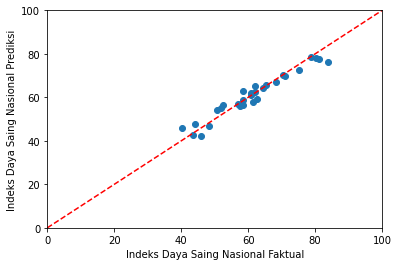

In [462]:
#Scatter plot data faktual dan data prediksi
plt.scatter(y_test, y_pred_test)
plt.plot([0, 100], [0,100], "--r")

plt.xlabel("Indeks Daya Saing Nasional Faktual")
plt.ylabel("Indeks Daya Saing Nasional Prediksi")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.savefig("predict.png")
plt.show()



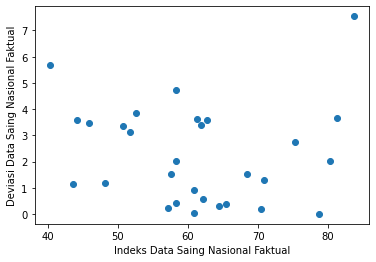

In [463]:
#Melihat deviasi data daya saing
dayasaing_deviation = np.abs(y_test - y_pred_test)

plt.scatter(y_test, dayasaing_deviation)
plt.xlabel("Indeks Data Saing Nasional Faktual")
plt.ylabel("Deviasi Data Saing Nasional Faktual")
plt.savefig("deviasi.png")
plt.show()

#### Observasi

* Performa model cukup baik ketika memprediksi pada rentang data 50-70
* jika dibawah 50 maka performa akan turun
* jika diatas 70 maka performa akan turun


#### Action

* EDA data-data dengan daya saing yang terlalu tinggi dan yang terlalu rendah
* Perlu penambahan data dikedua sisi tersebut terlalu tinggi dan terlalu rendah

# Prediksi Data

In [464]:
#Import data ekonomi untuk prediksi menggunakan pandas
coba_prediksi = pd.read_excel("dataekonomi_coba_prediksi.xlsx")
#Melihat Data
coba_prediksi.head()

,Country_name,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
0,Guyana,2800,4846165852,0.00148,352,0.0045,900,38.0,32.0,13.0,0.23
1,bahamas,1234,468515132,0.01260,100,0.1203,120,31.0,28.0,10.0,0.33
2,Turkmenistan,1522,1651685136,0.12000,250,0.0800,360,50.0,38.0,12.0,0.40
3,Suriname,1289,126154833,0.11000,100,0.1800,150,15.0,11.0,8.0,0.30
4,Togo,895,5151551,0.21000,80,0.1200,230,10.0,27.0,7.0,0.20


In [465]:
#memisahkan kolom negara
negara = coba_prediksi["Country_name"]

In [466]:
#Menghapus fitur eys
coba_prediksi = coba_prediksi.drop(["Country_name"], axis=1)
coba_prediksi.head()

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
0,2800,4846165852,0.00148,352,0.0045,900,38.0,32.0,13.0,0.23
1,1234,468515132,0.01260,100,0.1203,120,31.0,28.0,10.0,0.33
2,1522,1651685136,0.12000,250,0.0800,360,50.0,38.0,12.0,0.40
3,1289,126154833,0.11000,100,0.1800,150,15.0,11.0,8.0,0.30
4,895,5151551,0.21000,80,0.1200,230,10.0,27.0,7.0,0.20


In [467]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(coba_prediksi)

StandardScaler()

In [468]:
# Transform data coba prediksi
coba_prediksi_clean = scaler.transform(coba_prediksi)

In [469]:
# transform data menjadi dataframe
coba_prediksi_clean = pd.DataFrame(coba_prediksi_clean,
                                   columns = coba_prediksi.columns,
                                   index = coba_prediksi.index)

coba_prediksi_clean.head()

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
0,-0.537945,-0.175534,-0.287628,-0.347733,-1.631159,-0.222855,0.397591,-0.080633,1.237259,-0.283577
1,-0.635118,-0.268960,-0.258862,-0.470474,0.828628,-0.223917,0.005276,-0.313644,0.152539,0.331939
2,-0.617247,-0.243709,0.018959,-0.397414,-0.027412,-0.223590,1.070131,0.268884,0.875686,0.762800
3,-0.631705,-0.276266,-0.006909,-0.470474,2.096757,-0.223876,-0.891444,-1.303942,-0.570607,0.147284
4,-0.656153,-0.278849,0.251770,-0.480215,0.822256,-0.223767,-1.171670,-0.371897,-0.932181,-0.468232


In [470]:
#Prediksi dengan data baru
predict_result = random_forest.predict(coba_prediksi_clean)
predict_result = pd.DataFrame(predict_result,
                              columns=['predict_gci'])

#sanity check
predict_result.head()

,predict_gci
0,61.824
1,55.914
2,56.832
3,53.375
4,52.423


In [471]:
#sanity check
negara.head(13)

0           Guyana
1          bahamas
2     Turkmenistan
3         Suriname
4             Togo
5             Fiji
6          Myanmar
7          Eritrea
8      Timor Leste
9           Andora
10           Nauru
11        Kiribati
12         Vanuatu
Name: Country_name, dtype: object

In [472]:
#sanity check
coba_prediksi.head()

,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality
0,2800,4846165852,0.00148,352,0.0045,900,38.0,32.0,13.0,0.23
1,1234,468515132,0.01260,100,0.1203,120,31.0,28.0,10.0,0.33
2,1522,1651685136,0.12000,250,0.0800,360,50.0,38.0,12.0,0.40
3,1289,126154833,0.11000,100,0.1800,150,15.0,11.0,8.0,0.30
4,895,5151551,0.21000,80,0.1200,230,10.0,27.0,7.0,0.20


In [473]:
#menggabungkan data
frames = [negara, coba_prediksi, predict_result]

final_result = pd.concat(frames, axis=1)

In [474]:
#Sanity check
final_result.head(10)

,Country_name,gdpp,fdi,inflation,healthcare_spend,Unemployment_rate,carbon_emissions,Export,Imports,mys,gender_inequality,predict_gci
0,Guyana,2800,4846165852,0.00148,352,0.0045,900,38.0,32.0,13.0,0.23,61.824
1,bahamas,1234,468515132,0.01260,100,0.1203,120,31.0,28.0,10.0,0.33,55.914
2,Turkmenistan,1522,1651685136,0.12000,250,0.0800,360,50.0,38.0,12.0,0.40,56.832
3,Suriname,1289,126154833,0.11000,100,0.1800,150,15.0,11.0,8.0,0.30,53.375
4,Togo,895,5151551,0.21000,80,0.1200,230,10.0,27.0,7.0,0.20,52.423
5,Fiji,1147,4878952,0.05000,78,0.1145,400,22.0,17.0,6.0,0.40,53.405
6,Myanmar,2487,651484684,0.23000,121,0.1450,2840,24.0,25.0,11.0,0.21,55.804
7,Eritrea,1178,158484815,0.04800,35,0.1120,1021,17.0,13.0,9.0,0.30,55.731
8,Timor Leste,1598,65115681,0.23000,63,0.1270,970,30.0,14.0,7.0,0.21,53.951
9,Andora,3897,61654186,0.08000,54,0.0085,340,32.0,23.0,13.0,0.08,60.141
